In [1]:
import logging
import warnings

warnings.filterwarnings('ignore')

logging.basicConfig(level=logging.WARN)
logger=logging.getLogger(__name__)

In [2]:
import mlflow
print("start")
# Start MLflow run
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
mlflow.set_experiment("ML_Experiment")

start


<Experiment: artifact_location='mlflow-artifacts:/540529791419334751', creation_time=1712937792353, experiment_id='540529791419334751', last_update_time=1712937792353, lifecycle_stage='active', name='ML_Experiment', tags={}>

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from plot_keras_history import show_history
import keras




(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')



(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


In [4]:
import matplotlib.pyplot as plt

# Define function to show training history
def show_history(history):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    
    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    
    # Plot loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                15700     
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0032 - accuracy: 0.7683 - val_loss: 0.4062 - val_accuracy: 0.9014
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3439 - accuracy: 0.9060 - val_loss: 0.2903 - val_accuracy: 0

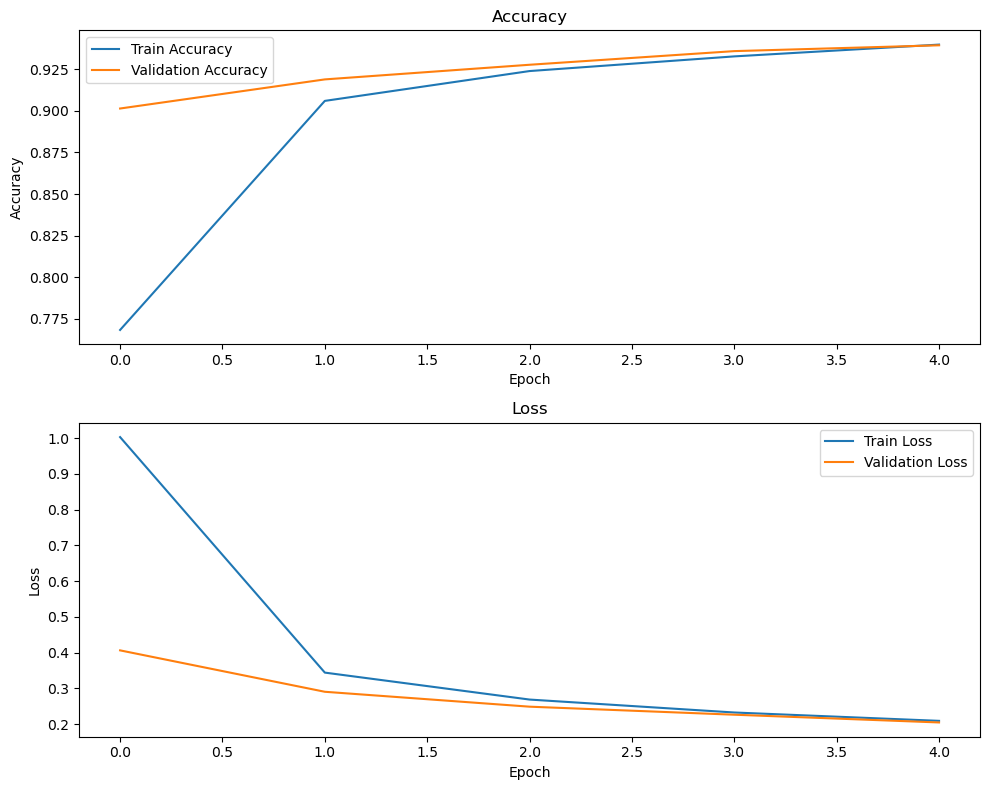

313/313 - 2s - loss: 0.2044 - accuracy: 0.9394 - 2s/epoch - 5ms/step
Test accuracy: 93.94%
1875/1875 - 9s - loss: 0.1931 - accuracy: 0.9445 - 9s/epoch - 5ms/step
Train accuracy: 94.45%


2024/04/12 15:33:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3999 - accuracy: 0.8875 - val_loss: 0.2061 - val_accuracy: 0.9351
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1747 - accuracy: 0.9464 - val_loss: 0.1517 - val_accur

<Figure size 640x480 with 0 Axes>

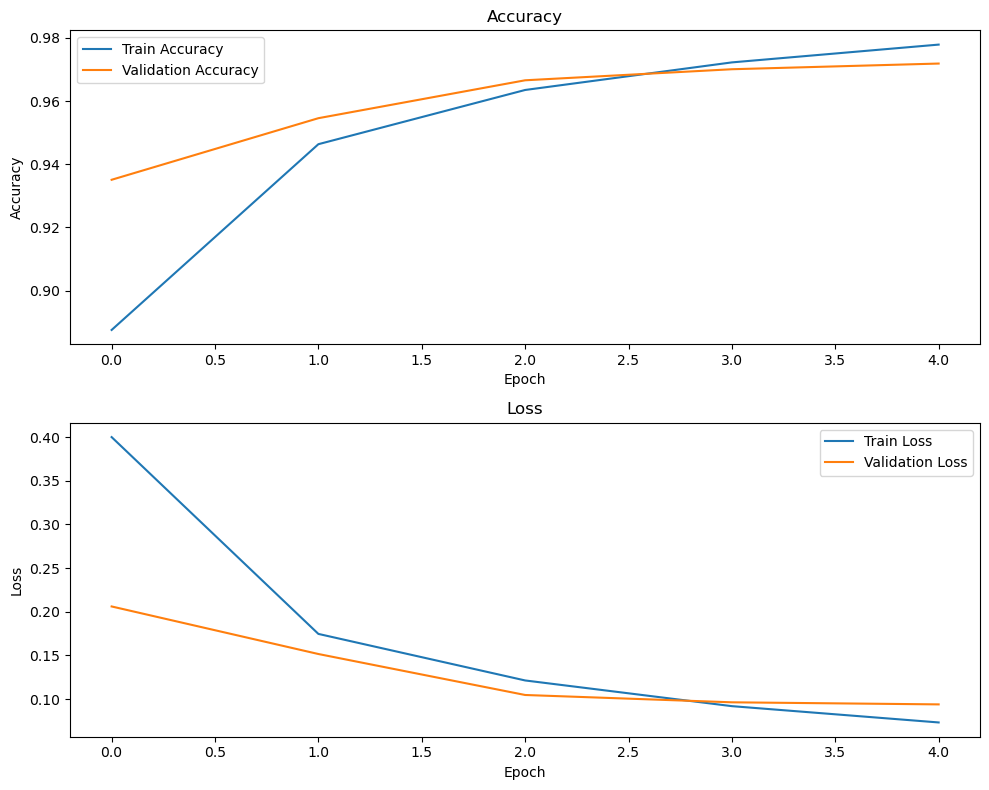

313/313 - 2s - loss: 0.0940 - accuracy: 0.9719 - 2s/epoch - 6ms/step
Test accuracy: 97.19%
1875/1875 - 11s - loss: 0.0599 - accuracy: 0.9817 - 11s/epoch - 6ms/step
Train accuracy: 98.17%


2024/04/12 15:36:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


<Figure size 640x480 with 0 Axes>

In [9]:
'''mlflow.set_experiment("Second_trial")
# let's try a basic neural network for digit classification
with mlflow.start_run(run_name="Model_1"):
    #mlflow.keras.autolog()
    mlflow.set_tag("Training Info", "Basic model- First one wo autologging")
    
    epoch=5
    model1 = keras.Sequential()
    model1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model1.add(layers.Dense(20, activation='sigmoid'))
    model1.add(layers.Dense(10, activation='softmax'))
    model1.summary()
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model1.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
    show_history(history)
    mlflow.log_figure(plt.gcf(), "training_history.png")
    
    test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy: {:5.2f}%".format(100*test_acc))
    train_loss, train_acc = model1.evaluate(x_train, y_train, verbose=2)
    print("Train accuracy: {:5.2f}%".format(100*train_acc))
    artifact_path = "model1"
  
    mlflow.log_param("epochs", epoch)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("test_accuracy", test_acc)
    mlflow.log_metric("train_loss", train_loss)
    mlflow.log_metric("test_loss", test_loss)
    mlflow.keras.log_model(model1,artifact_path)
    #mlflow.log_figure(fig1, "time_series_demand.png")


    mlflow.set_tag("Training Info2", "Basic model- First one wo autologging")

    model2 = keras.Sequential()
    model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model2.add(layers.Dense(128, activation='sigmoid'))
    model2.add(layers.Dense(10, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    epoch=5
    history = model2.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
    show_history(history)
    mlflow.log_figure(plt.gcf(), "training_history.png")
    
    test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy: {:5.2f}%".format(100*test_acc))
    train_loss, train_acc = model2.evaluate(x_train, y_train, verbose=2)
    print("Train accuracy: {:5.2f}%".format(100*train_acc))
    artifact_path = "model2"
   
    mlflow.log_param("epochs", epoch)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("test_accuracy", test_acc)
    mlflow.log_metric("train_loss", train_loss)
    mlflow.log_metric("test_loss", test_loss)
    mlflow.keras.log_model(model2,artifact_path)'''
    

In [9]:
#1.log metrics

with mlflow.start_run(run_name="log_metrics"):
    epoch = 5
    learning = 0.01
    momentum=0.5
    config = {'hidden_layers': [20,10]}
    model9 = keras.Sequential()
    model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model9.add(layers.Dense(10, activation='sigmoid'))
    model9.add(layers.Dense(10, activation='softmax'))
    model9.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
    model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy: {:5.2f}%".format(100*test_acc))
    train_loss, train_acc = model9.evaluate(x_train, y_train, verbose=2)
    print("Train accuracy: {:5.2f}%".format(100*train_acc))
    artifact_path = "model9"

    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("validation_accuracy", test_acc)
    mlflow.log_metric("train_loss", train_loss)
    mlflow.log_metric("validation_loss", test_loss)
    
with mlflow.start_run(run_name="Autolog_metrics"):
    epoch = 5
    learning = 0.01
    momentum=0.5
    mlflow.autolog()
    config = {'hidden_layers': [20,10]}
    model9 = keras.Sequential()
    model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model9.add(layers.Dense(10, activation='sigmoid'))
    model9.add(layers.Dense(10, activation='softmax'))
    model9.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
    model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    
   

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                15700     
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   1/1875 [..............................] - ETA: 51:29 - loss: 2.3283 - accuracy: 0.1250WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0055s vs `on_train_batch_end` time: 0.0089s). Check your callbacks.


1875/1875 [==============================] - 20s 10ms/step - loss: 2.1826 - accuracy: 0.3542 - val_loss: 1.9445 - val_accuracy: 0.5244
Epoch 2/5


C:\Users\Senthil\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 18s 9ms/step - loss: 1.6172 - accuracy: 0.6111 - val_loss: 1.3094 - val_accuracy: 0.6812
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1137 - accuracy: 0.7408 - val_loss: 0.9251 - val_accuracy: 0.7902
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.8080 - accuracy: 0.8205 - val_loss: 0.6909 - val_accuracy: 0.8438
Epoch 5/5
1/1 [==============================] - 0s 241ms/step
INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmphlcmv_ez\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmphlcmv_ez\model\data\model\assets


313/313 - 2s - loss: 0.5580 - accuracy: 0.8641 - 2s/epoch - 5ms/step
Test accuracy: 86.41%
1875/1875 - 9s - loss: 0.5698 - accuracy: 0.8622 - 9s/epoch - 5ms/step
Train accuracy: 86.22%


2024/04/12 22:00:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/12 22:00:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                15700     
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   6/1875 [..............................] - ETA: 18s - loss: 2.4429 - accuracy: 0.0990  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0053s vs `on_train_batch_end` time: 0.0088s). Check your callbacks.


1875/1875 [==============================] - 20s 10ms/step - loss: 2.1699 - accuracy: 0.3520 - val_loss: 1.9132 - val_accuracy: 0.5217
Epoch 2/5
   1/1875 [..............................] - ETA: 20s - loss: 1.9718 - accuracy: 0.4688

C:\Users\Senthil\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 17s 9ms/step - loss: 1.5728 - accuracy: 0.5710 - val_loss: 1.2848 - val_accuracy: 0.6410
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1243 - accuracy: 0.6735 - val_loss: 0.9842 - val_accuracy: 0.7170
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8933 - accuracy: 0.7513 - val_loss: 0.8051 - val_accuracy: 0.7793
Epoch 5/5
1/1 [==============================] - 0s 221ms/step
INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmpnfi0gtz2\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmpnfi0gtz2\model\data\model\assets


In [12]:
#2.log parameters

with mlflow.start_run(run_name="log_params"):
    epoch = 5
    learning = 0.01
    momentum=0.5
    config = {'hidden_layers': [20,10]}
    model9 = keras.Sequential()
    model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model9.add(layers.Dense(10, activation='sigmoid'))
    model9.add(layers.Dense(10, activation='softmax'))
    model9.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
    model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy: {:5.2f}%".format(100*test_acc))
    train_loss, train_acc = model9.evaluate(x_train, y_train, verbose=2)
    print("Train accuracy: {:5.2f}%".format(100*train_acc))
    artifact_path = "model9"

    mlflow.log_param("epochs", epoch)
    mlflow.log_param("opt_learning_rate", learning)
    mlflow.log_param("opt_momentum", momentum)
    mlflow.log_param("Configuration", config)
    
with mlflow.start_run(run_name="Autolog_params"):
    epoch = 5
    learning = 0.01
    momentum=0.5
    mlflow.autolog()
    config = {'hidden_layers': [20,10]}
    model9 = keras.Sequential()
    model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model9.add(layers.Dense(10, activation='sigmoid'))
    model9.add(layers.Dense(10, activation='softmax'))
    model9.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
    model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    
   

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                15700     
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   1/1875 [..............................] - ETA: 55:14 - loss: 2.5235 - accuracy: 0.0312WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0053s vs `on_train_batch_end` time: 0.0075s). Check your callbacks.


1875/1875 [==============================] - 20s 10ms/step - loss: 2.1803 - accuracy: 0.3187 - val_loss: 1.9425 - val_accuracy: 0.4502
Epoch 2/5
   1/1875 [..............................] - ETA: 27s - loss: 2.0314 - accuracy: 0.3438

C:\Users\Senthil\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 17s 9ms/step - loss: 1.6231 - accuracy: 0.5209 - val_loss: 1.3381 - val_accuracy: 0.6051
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1638 - accuracy: 0.6728 - val_loss: 1.0051 - val_accuracy: 0.7281
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.9056 - accuracy: 0.7631 - val_loss: 0.7989 - val_accuracy: 0.8091
Epoch 5/5
1/1 [==============================] - 0s 278ms/step
INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmpu_trljmz\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmpu_trljmz\model\data\model\assets


313/313 - 2s - loss: 0.6520 - accuracy: 0.8524 - 2s/epoch - 5ms/step
Test accuracy: 85.24%
1875/1875 - 9s - loss: 0.6638 - accuracy: 0.8420 - 9s/epoch - 5ms/step
Train accuracy: 84.20%


2024/04/12 22:37:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/12 22:37:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                15700     
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   1/1875 [..............................] - ETA: 1:00:59 - loss: 2.5059 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0042s vs `on_train_batch_end` time: 0.0100s). Check your callbacks.


1875/1875 [==============================] - 21s 10ms/step - loss: 2.2166 - accuracy: 0.2997 - val_loss: 2.0484 - val_accuracy: 0.5063


C:\Users\Senthil\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 1.7511 - accuracy: 0.5610 - val_loss: 1.4166 - val_accuracy: 0.6386
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 1.1830 - accuracy: 0.6841 - val_loss: 0.9768 - val_accuracy: 0.7394
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8714 - accuracy: 0.7766 - val_loss: 0.7587 - val_accuracy: 0.8221
Epoch 5/5
1/1 [==============================] - 0s 346ms/step
INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmphkb64pxo\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Senthil\AppData\Local\Temp\tmphkb64pxo\model\data\model\assets


2024/04/13 13:22:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:22:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/5
   1/1875 [..............................] - ETA: 1:01:18 - loss: 2.4596 - accuracy: 0.1250

1875/1875 [==============================] - 20s 10ms/step - loss: 1.0179 - accuracy: 0.7652 - val_loss: 0.4627 - val_accuracy: 0.8823
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3635 - accuracy: 0.9032 - val_loss: 0.2946 - val_accuracy: 0.9179
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2669 - accuracy: 0.9245 - val_loss: 0.2484 - val_accuracy: 0.9297
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2255 - accuracy: 0.9354 - val_loss: 0.2160 - val_accuracy: 0.9366
Epoch 5/5
1/1 [==============================] - 0s 236ms/step


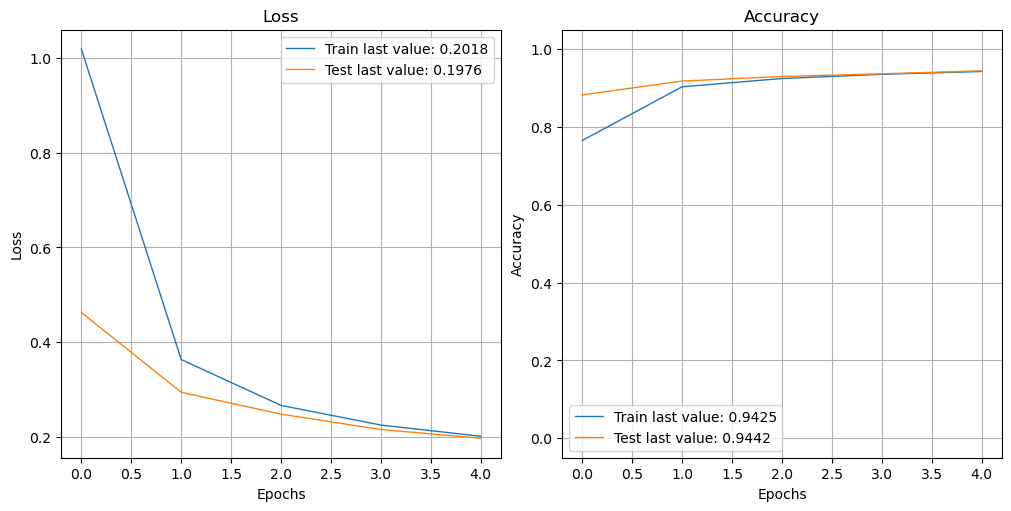

2024/04/13 13:24:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:24:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/5
1875/1875 [==============================] - 29s 14ms/step - loss: 0.3961 - accuracy: 0.8885 - val_loss: 0.2092 - val_accuracy: 0.9360
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1747 - accuracy: 0.9469 - val_loss: 0.1399 - val_accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1213 - accuracy: 0.9637 - val_loss: 0.1130 - val_accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0928 - accuracy: 0.9722 - val_loss: 0.0962 - val_accuracy: 0.9702
Epoch 5/5
1/1 [==============================] - 0s 227ms/step


<Figure size 640x480 with 0 Axes>

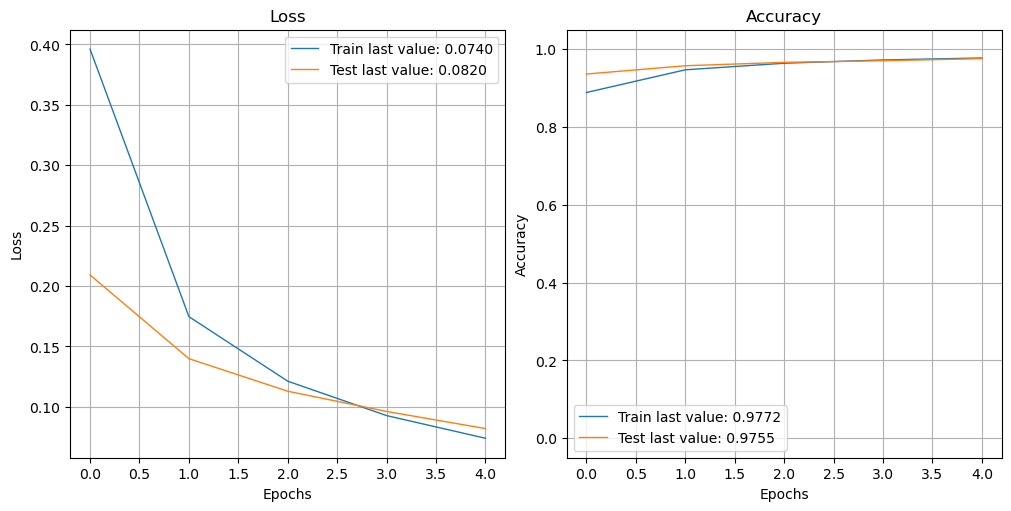

2024/04/13 13:27:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:27:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/5
5/5 [==============================] - 7s 973ms/step - loss: 7.3664 - accuracy: 0.1458 - val_loss: 6.5249 - val_accuracy: 0.3309
Epoch 2/5
5/5 [==============================] - 3s 767ms/step - loss: 6.1701 - accuracy: 0.3073 - val_loss: 5.6930 - val_accuracy: 0.4745
Epoch 3/5
5/5 [==============================] - 3s 752ms/step - loss: 5.4337 - accuracy: 0.4579 - val_loss: 5.0675 - val_accuracy: 0.5230
Epoch 4/5
5/5 [==============================] - 3s 746ms/step - loss: 4.8595 - accuracy: 0.5123 - val_loss: 4.5591 - val_accuracy: 0.4932
Epoch 5/5
5/5 [==============================] - 3s 767ms/step - loss: 4.3908 - accuracy: 0.4738 - val_loss: 4.1397 - val_accuracy: 0.4711


1/1 [==============================] - 0s 227ms/step


<Figure size 640x480 with 0 Axes>

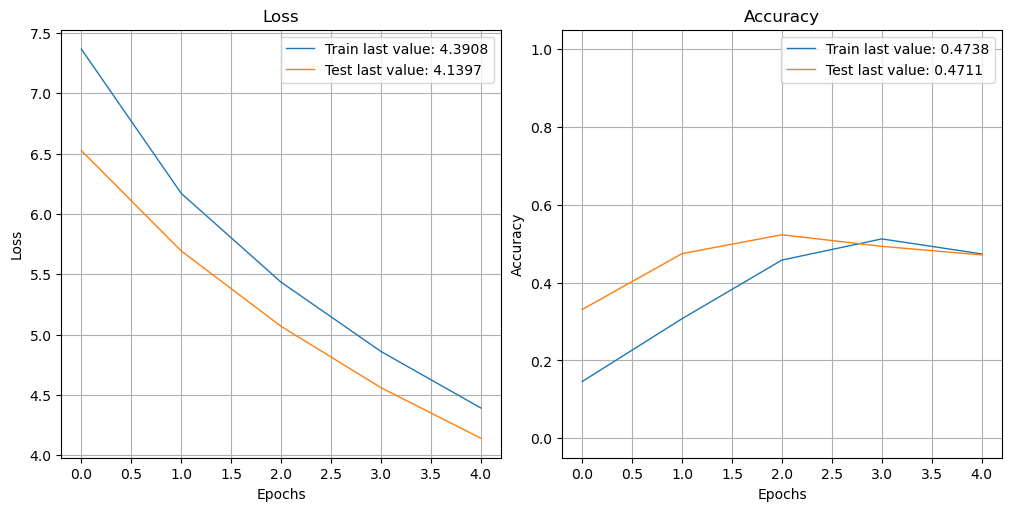

2024/04/13 13:29:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:29:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.8567 - accuracy: 0.7219 - val_loss: 0.3000 - val_accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4463 - accuracy: 0.8698 - val_loss: 0.2483 - val_accuracy: 0.9284
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3863 - accuracy: 0.8917 - val_loss: 0.2174 - val_accuracy: 0.9372
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3506 - accuracy: 0.9029 - val_loss: 0.1970 - val_accuracy: 0.9426
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3268 - accuracy: 0.9114 - val_loss: 0.1874 - val_accuracy: 0.9472


1/1 [==============================] - 0s 237ms/step


<Figure size 640x480 with 0 Axes>

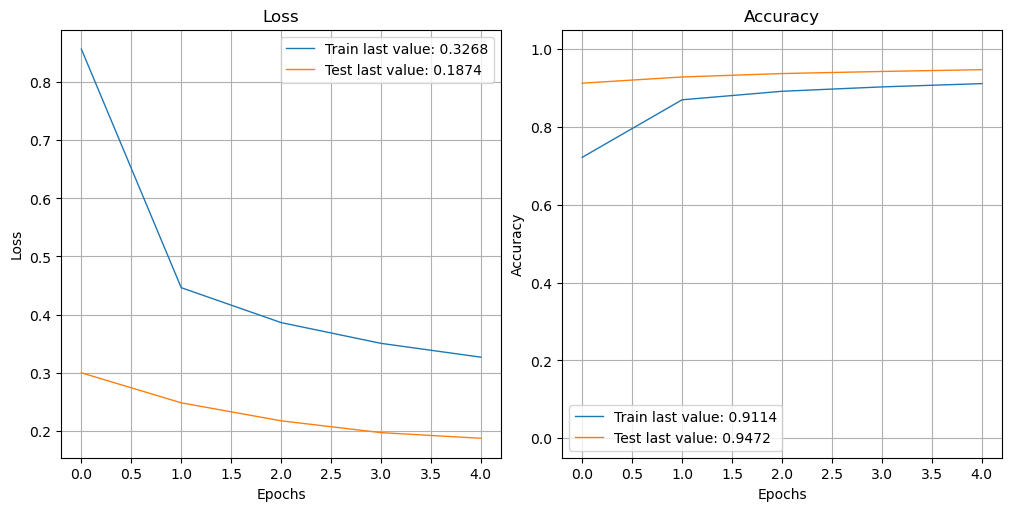

2024/04/13 13:32:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:32:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   6/1875 [..............................] - ETA: 22s - loss: 2.3328 - accuracy: 0.1146  

1875/1875 [==============================] - 28s 14ms/step - loss: 0.3927 - accuracy: 0.8898 - val_loss: 0.1965 - val_accuracy: 0.9408
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1731 - accuracy: 0.9480 - val_loss: 0.1344 - val_accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1188 - accuracy: 0.9641 - val_loss: 0.1108 - val_accuracy: 0.9658
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0899 - accuracy: 0.9720 - val_loss: 0.0951 - val_accuracy: 0.9703
Epoch 5/5
1/1 [==============================] - 0s 268ms/step


<Figure size 640x480 with 0 Axes>

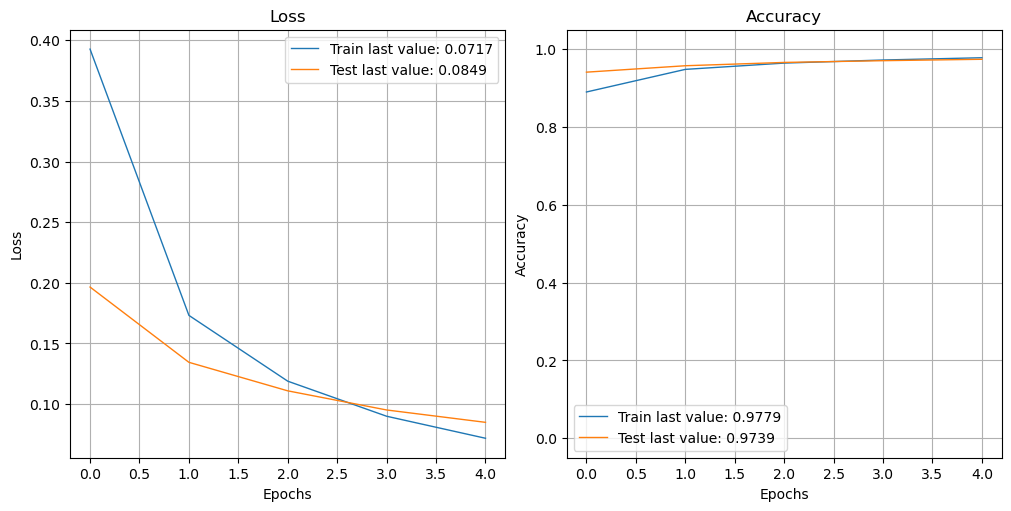

2024/04/13 13:35:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:35:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/5
   1/1875 [..............................] - ETA: 49:25 - loss: 2.4525 - accuracy: 0.0625

1875/1875 [==============================] - 19s 9ms/step - loss: 1.9438 - accuracy: 0.3208 - val_loss: 1.2288 - val_accuracy: 0.6506
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 1.3246 - accuracy: 0.6047 - val_loss: 1.6188 - val_accuracy: 0.5720
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 1.2655 - accuracy: 0.6446 - val_loss: 0.9255 - val_accuracy: 0.7367
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 1.1363 - accuracy: 0.6549 - val_loss: 0.9923 - val_accuracy: 0.6811
Epoch 5/5
1/1 [==============================] - 0s 226ms/step


<Figure size 640x480 with 0 Axes>

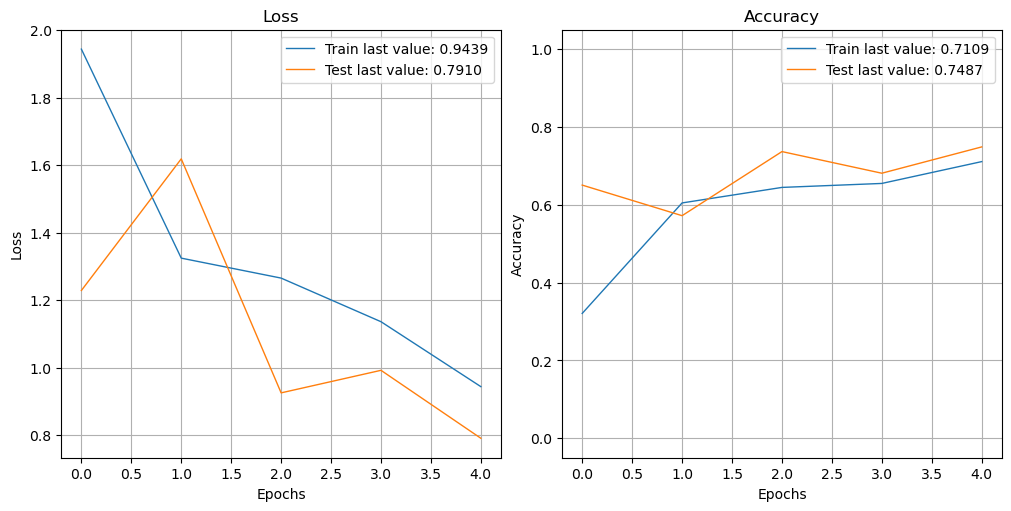

2024/04/13 13:37:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:37:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                15700     
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   1/1875 [..............................] - ETA: 49:28 - loss: 2.4021 - accuracy: 0.0625

1875/1875 [==============================] - 19s 9ms/step - loss: 2.3390 - accuracy: 0.1033 - val_loss: 2.3406 - val_accuracy: 0.1019
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3384 - accuracy: 0.1030 - val_loss: 2.3400 - val_accuracy: 0.1019
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3378 - accuracy: 0.1028 - val_loss: 2.3394 - val_accuracy: 0.1018
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3372 - accuracy: 0.1028 - val_loss: 2.3387 - val_accuracy: 0.1017
Epoch 5/5
1/1 [==============================] - 0s 250ms/step


<Figure size 640x480 with 0 Axes>

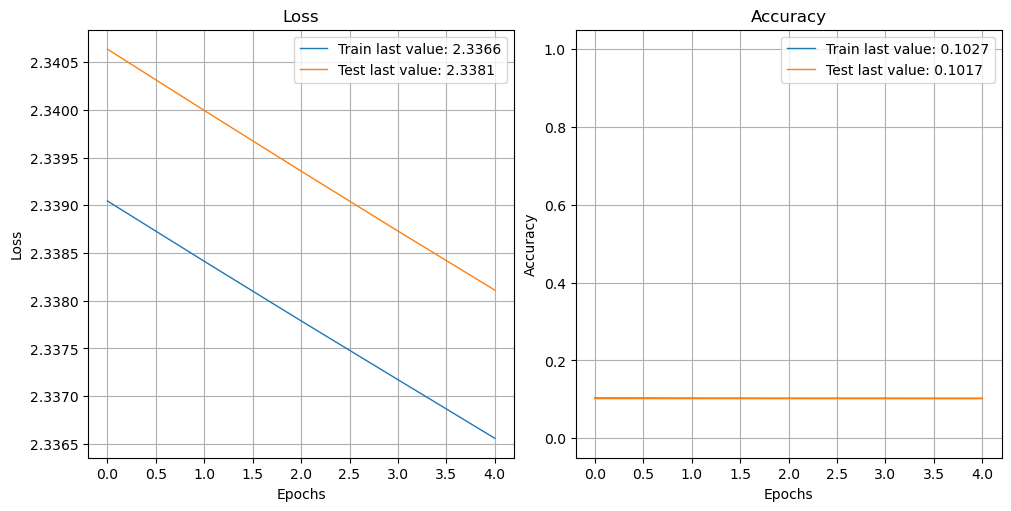

2024/04/13 13:39:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:39:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                15700     
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   1/1875 [..............................] - ETA: 50:43 - loss: 2.3851 - accuracy: 0.1250

1875/1875 [==============================] - 19s 9ms/step - loss: 2.2603 - accuracy: 0.2259 - val_loss: 2.1868 - val_accuracy: 0.3059
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 2.0757 - accuracy: 0.4209 - val_loss: 1.9305 - val_accuracy: 0.4622
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 1.7682 - accuracy: 0.5142 - val_loss: 1.5930 - val_accuracy: 0.5565
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 1.4471 - accuracy: 0.6003 - val_loss: 1.3001 - val_accuracy: 0.6448
Epoch 5/5
1/1 [==============================] - 0s 233ms/step


<Figure size 640x480 with 0 Axes>

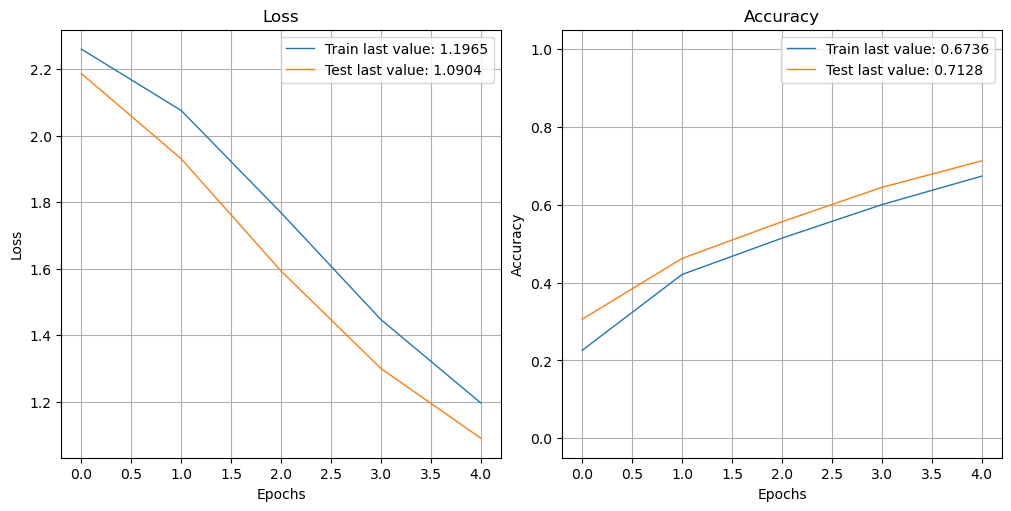

2024/04/13 13:42:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:42:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                15700     
                                                                 
 dense_34 (Dense)            (None, 10)                210       
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
   1/1875 [..............................] - ETA: 49:44 - loss: 2.3635 - accuracy: 0.0938

1875/1875 [==============================] - 19s 9ms/step - loss: 2.1492 - accuracy: 0.3418 - val_loss: 1.8832 - val_accuracy: 0.4785
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 1.5746 - accuracy: 0.5738 - val_loss: 1.3187 - val_accuracy: 0.6449
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 1.1405 - accuracy: 0.6899 - val_loss: 0.9838 - val_accuracy: 0.7418
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8803 - accuracy: 0.7656 - val_loss: 0.7770 - val_accuracy: 0.8080
Epoch 5/5
1/1 [==============================] - 0s 229ms/step


<Figure size 640x480 with 0 Axes>

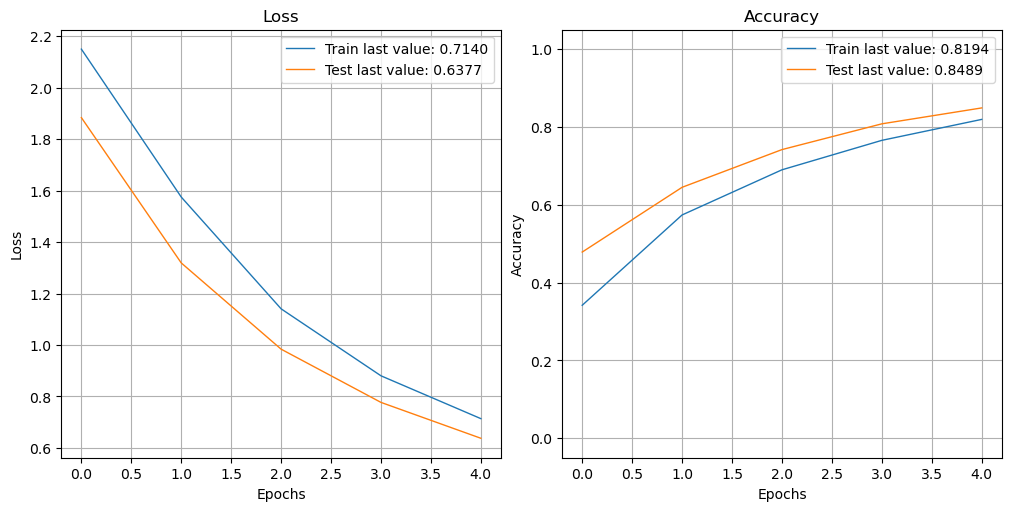

2024/04/13 13:44:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/13 13:44:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                15700     
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
  6/118 [>.............................] - ETA: 1s - loss: 2.3471 - accuracy: 0.1003  

118/118 [==============================] - 5s 23ms/step - loss: 2.1489 - accuracy: 0.3089 - val_loss: 1.9776 - val_accuracy: 0.4452
Epoch 2/5
118/118 [==============================] - 2s 17ms/step - loss: 1.8423 - accuracy: 0.5062 - val_loss: 1.6998 - val_accuracy: 0.5790
Epoch 3/5
118/118 [==============================] - 2s 17ms/step - loss: 1.5803 - accuracy: 0.6349 - val_loss: 1.4524 - val_accuracy: 0.7059
Epoch 4/5
118/118 [==============================] - 2s 17ms/step - loss: 1.3525 - accuracy: 0.7375 - val_loss: 1.2411 - val_accuracy: 0.7804
Epoch 5/5
1/1 [==============================] - 0s 218ms/step


<Figure size 640x480 with 0 Axes>

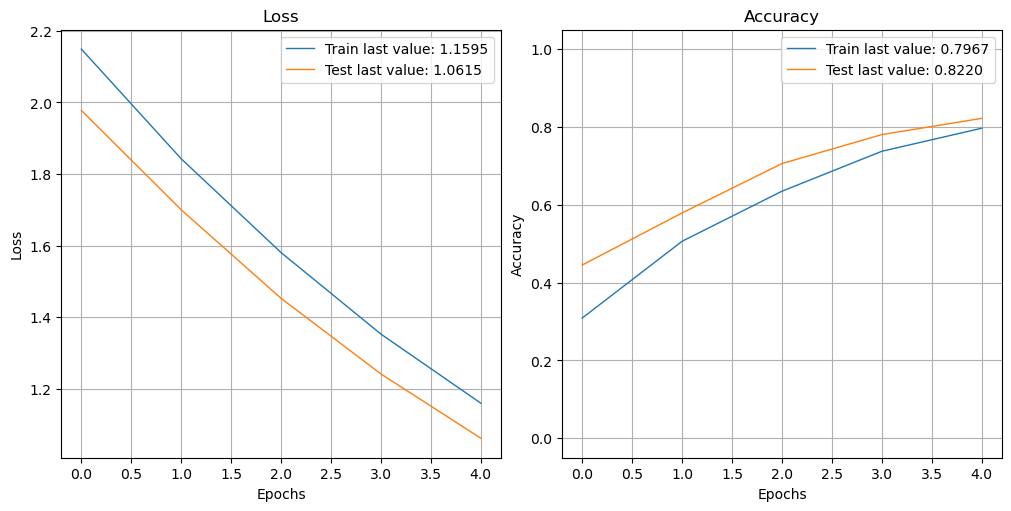

<Figure size 640x480 with 0 Axes>

In [9]:
#Autologging all models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from tensorflow.keras.layers import Dropout


with mlflow.start_run(run_name="Main_Run_autolog") as main_run:
    main_run_id = main_run.info.run_id
    
    # Start sub-experiment
    with mlflow.start_run(run_name="Sub_Run_1", nested=True) as sub_run:
        epoch=5
        config = {'hidden_layers': [20, 10]}
        # Log network configuration
        mlflow.autolog()    
        model1 = keras.Sequential()
        model1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model1.add(layers.Dense(20, activation='sigmoid'))
        model1.add(layers.Dense(10, activation='softmax'))
        model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history1 = model1.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history1)
        mlflow.log_figure(plt.gcf(), "training_history.png")
    
    with mlflow.start_run(run_name="Sub_Run_2", nested=True) as sub_run:
        epoch = 5
        config = {'hidden_layers': [256, 128]}
        mlflow.autolog()   
        model2 = keras.Sequential()
        model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model2.add(layers.Dense(128, activation='sigmoid'))
        model2.add(layers.Dense(10, activation='softmax'))
        model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history2 = model2.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history2)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_3", nested=True) as sub_run:
        mlflow.autolog() 
        epoch= 5
        stepsperepoch = 5
        regularization = 0.01
        config = {'hidden_layers': [256, 128]}
        model3 = keras.Sequential()
        model3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(10, activation='softmax'))
        model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history3 = model3.fit(x_train, y_train, epochs=epoch, steps_per_epoch=stepsperepoch, validation_data=(x_test, y_test))
        show_history(history3)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_4", nested=True) as sub_run:
        mlflow.autolog() 
        epoch = 5
        dropout_1 = 0.7
        dropout_2 = 0.6
        config = {'hidden_layers': [256, 128]}
        model4 = keras.Sequential()
        model4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model4.add(Dropout(dropout_1))
        model4.add(layers.Dense(128, activation='sigmoid'))
        model4.add(Dropout(dropout_2))
        model4.add(layers.Dense(10, activation='softmax'))
        model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history4 = model4.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history4)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_5", nested=True) as sub_run:
        mlflow.autolog() 
        min_delta=0.01
        patience=2
        epoch = 5
        config = {'hidden_layers': [256, 128]}
        model5 = keras.Sequential()
        model5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model5.add(layers.Dense(128, activation='sigmoid'))
        model5.add(layers.Dense(10, activation='softmax'))
        model5.summary()
        model5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
        es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=min_delta, patience=patience)
        history5=model5.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), callbacks=[es])
        show_history(history5)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_6", nested=True) as sub_run:
        mlflow.autolog() 
        epoch = 5
        learning = 10
        config = {'hidden_layers': [20,10]}
        model6 = keras.Sequential()
        model6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model6.add(layers.Dense(10, activation='sigmoid'))
        model6.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history6= model6.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history6)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_7", nested=True) as sub_run:
        mlflow.autolog() 
        epoch = 5
        learning = 0.00001
        config = {'hidden_layers': [20,10]}
        model7 = keras.Sequential()
        model7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model7.add(layers.Dense(10, activation='sigmoid'))
        model7.add(layers.Dense(10, activation='softmax'))
        model7.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history7= model7.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history7)
        mlflow.log_figure(plt.gcf(), "training_history.png")
     
    with mlflow.start_run(run_name="Sub_Run_8", nested=True) as sub_run:
        mlflow.autolog()
        epoch = 5
        learning = 0.01
        config = {'hidden_layers': [20,10]}
        model8 = keras.Sequential()
        model8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model8.add(layers.Dense(10, activation='sigmoid'))
        model8.add(layers.Dense(10, activation='softmax'))
        model8.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history8= model8.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history8)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_9", nested=True) as sub_run:
        mlflow.autolog()
        epoch = 5
        learning = 0.01
        momentum=0.5
        config = {'hidden_layers': [20,10]}
        model9 = keras.Sequential()
        model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model9.add(layers.Dense(10, activation='sigmoid'))
        model9.add(layers.Dense(10, activation='softmax'))
        model9.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history9)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
    with mlflow.start_run(run_name="Sub_Run_10", nested=True) as sub_run:
        mlflow.autolog()
        epoch = 5
        batch=512
        learning = 0.01
        momentum=0.5
        config = {'hidden_layers': [20,10]}
        model10 = keras.Sequential()
        model10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model10.add(layers.Dense(10, activation='sigmoid'))
        model10.add(layers.Dense(10, activation='softmax'))
        model10.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model10.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history10=model10.fit(x_train, y_train, batch_size=batch, epochs=epoch ,validation_data=(x_test, y_test))
        show_history(history10)
        mlflow.log_figure(plt.gcf(), "training_history.png")



Epoch 1/4
1875/1875 [==============================] - 17s 8ms/step - loss: 0.9636 - accuracy: 0.7745 - val_loss: 0.4318 - val_accuracy: 0.8872
Epoch 2/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3505 - accuracy: 0.9029 - val_loss: 0.2951 - val_accuracy: 0.9162
Epoch 3/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2693 - accuracy: 0.9226 - val_loss: 0.2526 - val_accuracy: 0.9259
Epoch 4/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2324 - accuracy: 0.9324 - val_loss: 0.2293 - val_accuracy: 0.9333


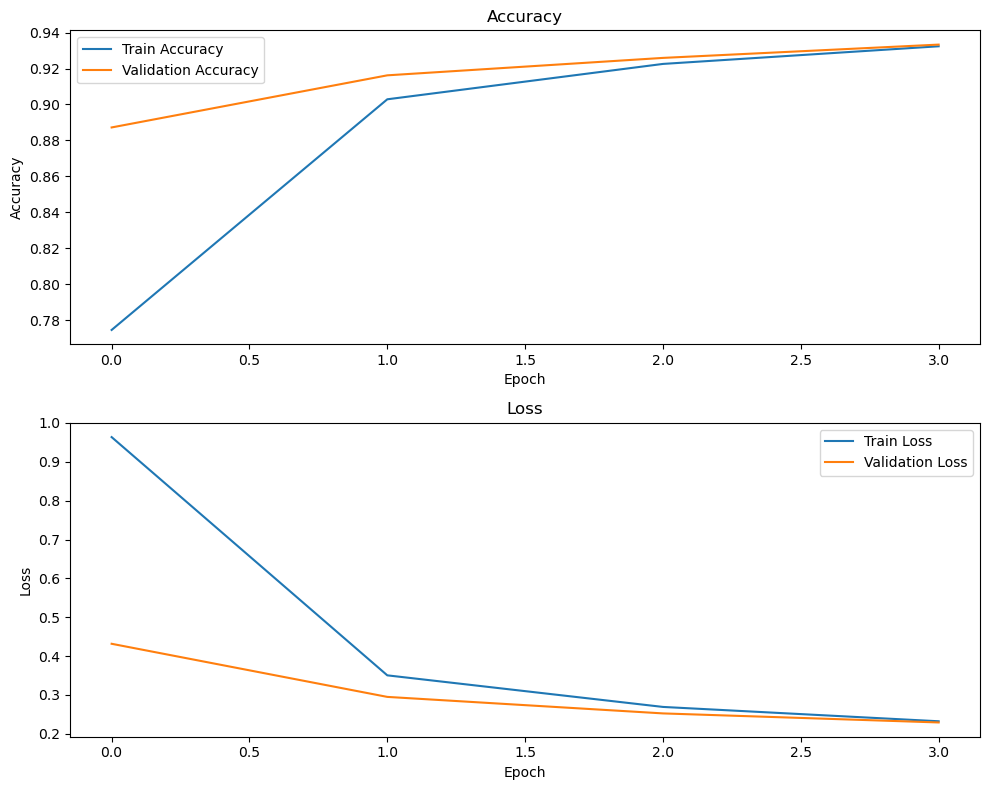

313/313 - 1s - loss: 0.2293 - accuracy: 0.9333 - 1s/epoch - 5ms/step
Test accuracy: 93.33%
1875/1875 - 8s - loss: 0.2141 - accuracy: 0.9381 - 8s/epoch - 5ms/step
Train accuracy: 93.81%


2024/04/13 19:58:51 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/4
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3991 - accuracy: 0.8875 - val_loss: 0.2117 - val_accuracy: 0.9366
Epoch 2/4
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1713 - accuracy: 0.9477 - val_loss: 0.1431 - val_accuracy: 0.9556
Epoch 3/4
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1183 - accuracy: 0.9645 - val_loss: 0.1037 - val_accuracy: 0.9684
Epoch 4/4
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.0886 - val_accuracy: 0.9726


<Figure size 640x480 with 0 Axes>

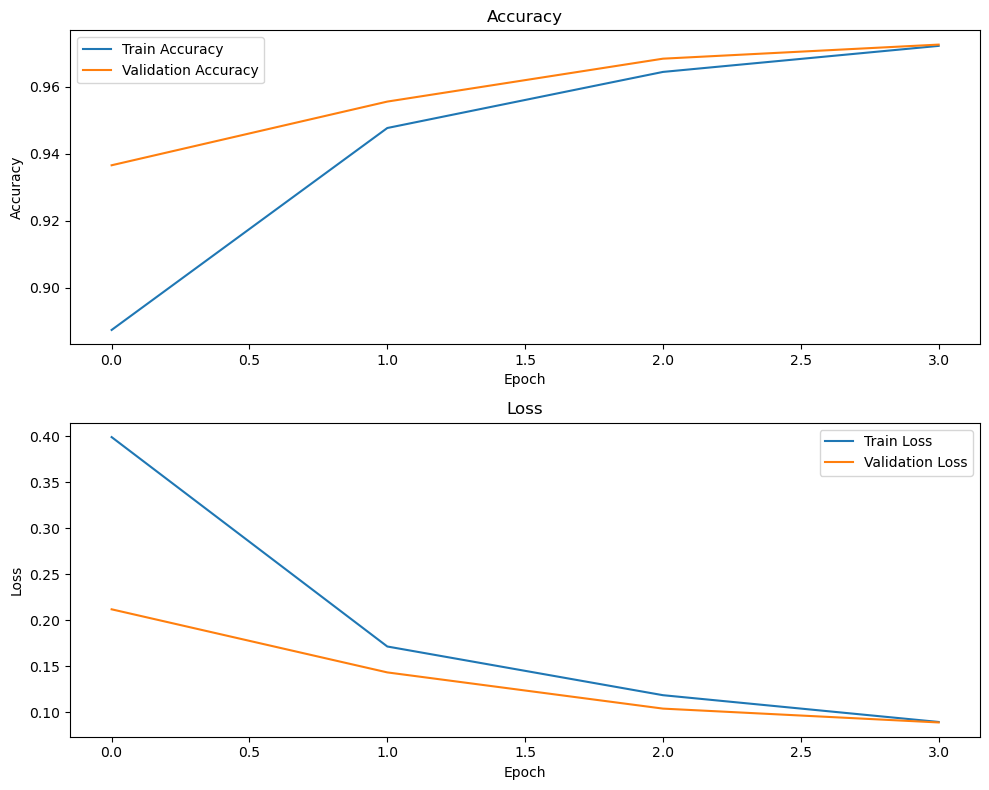

313/313 - 2s - loss: 0.0886 - accuracy: 0.9726 - 2s/epoch - 6ms/step
Test accuracy: 97.26%
1875/1875 - 11s - loss: 0.0664 - accuracy: 0.9802 - 11s/epoch - 6ms/step
Train accuracy: 98.02%


2024/04/13 20:01:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/4
5/5 [==============================] - 5s 817ms/step - loss: 49.4506 - accuracy: 0.0975 - val_loss: 40.6413 - val_accuracy: 0.0974
Epoch 2/4
5/5 [==============================] - 3s 642ms/step - loss: 37.0433 - accuracy: 0.0975 - val_loss: 32.3320 - val_accuracy: 0.0974
Epoch 3/4
5/5 [==============================] - 3s 636ms/step - loss: 29.8296 - accuracy: 0.0966 - val_loss: 26.3976 - val_accuracy: 0.1340
Epoch 4/4
5/5 [==============================] - 3s 631ms/step - loss: 24.4576 - accuracy: 0.1335 - val_loss: 21.7505 - val_accuracy: 0.1814


<Figure size 640x480 with 0 Axes>

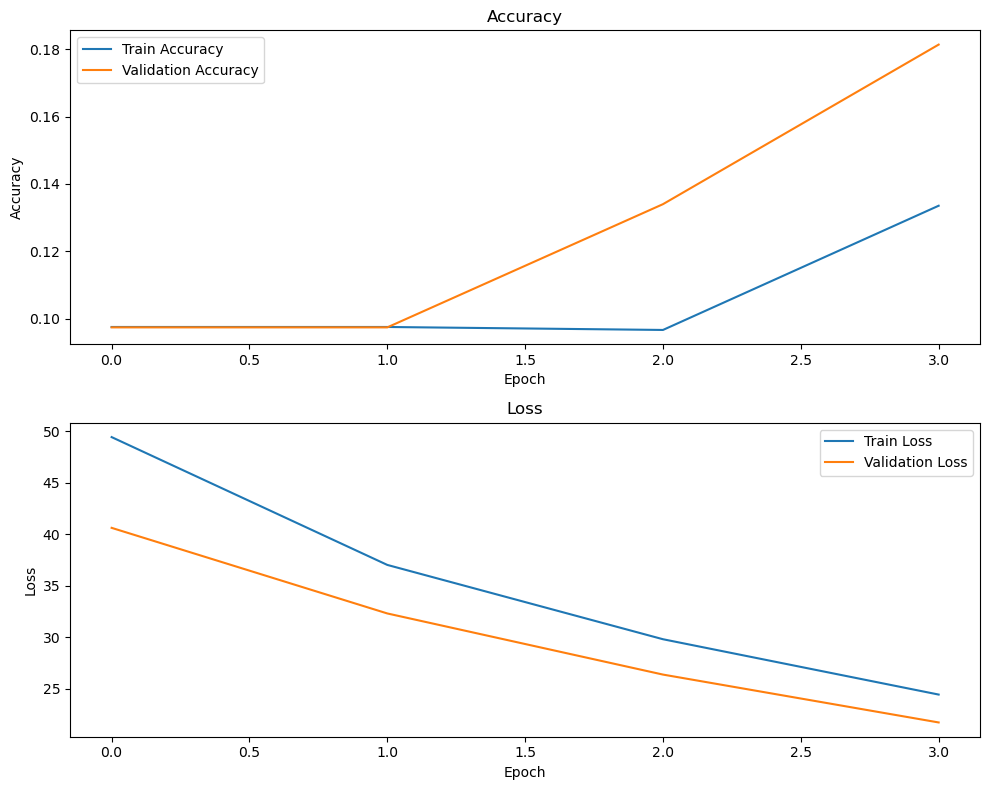

313/313 - 2s - loss: 21.7505 - accuracy: 0.1814 - 2s/epoch - 6ms/step
Test accuracy: 18.14%
1875/1875 - 11s - loss: 21.7517 - accuracy: 0.1742 - 11s/epoch - 6ms/step
Train accuracy: 17.42%


2024/04/13 20:02:44 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 0.7973 - accuracy: 0.7459 - val_loss: 0.2824 - val_accuracy: 0.9181
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4073 - accuracy: 0.8850 - val_loss: 0.2213 - val_accuracy: 0.9354
Epoch 3/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3434 - accuracy: 0.9053 - val_loss: 0.1908 - val_accuracy: 0.9422
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2998 - accuracy: 0.9189 - val_loss: 0.1700 - val_accuracy: 0.9506
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2765 - accuracy: 0.9270 - val_loss: 0.1558 - val_accuracy: 0.9560


<Figure size 640x480 with 0 Axes>

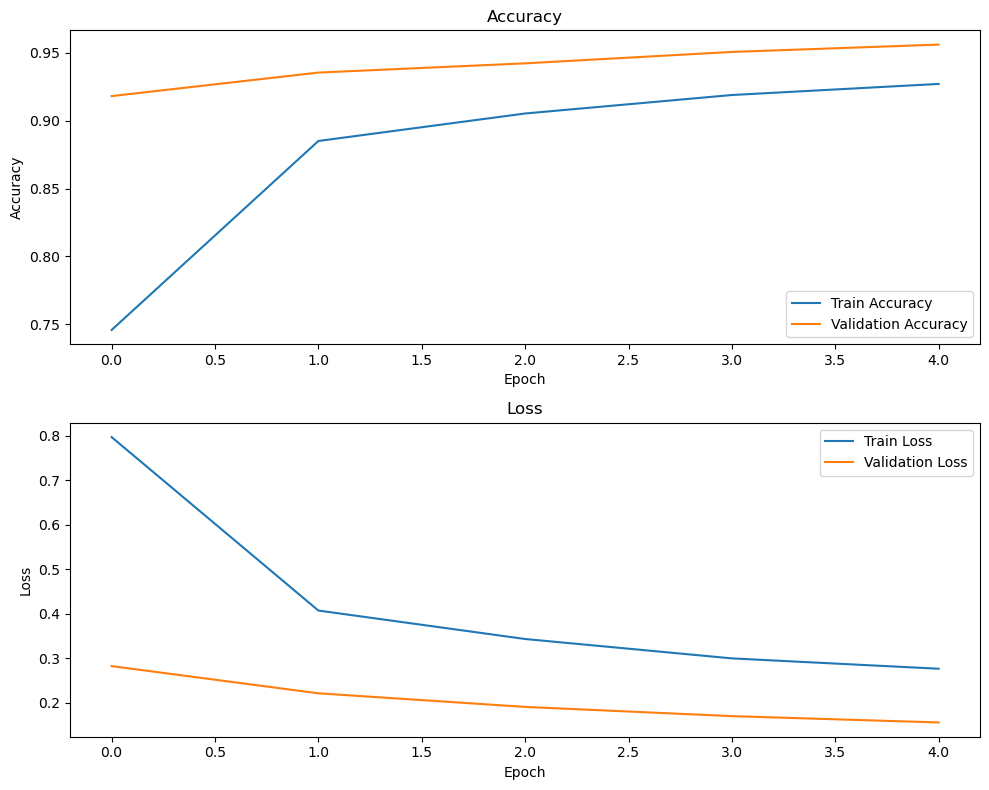

313/313 - 2s - loss: 0.1558 - accuracy: 0.9560 - 2s/epoch - 6ms/step
Test accuracy: 95.60%
1875/1875 - 11s - loss: 0.1524 - accuracy: 0.9570 - 11s/epoch - 6ms/step
Train accuracy: 95.70%


2024/04/13 20:05:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 256)               200960    
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dense_53 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3983 - accuracy: 0.8862 - val_loss: 0.2097 - val_accuracy: 0.9356
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1752 - accuracy: 0.9478 - val_loss: 0.1424 - val_accu

<Figure size 640x480 with 0 Axes>

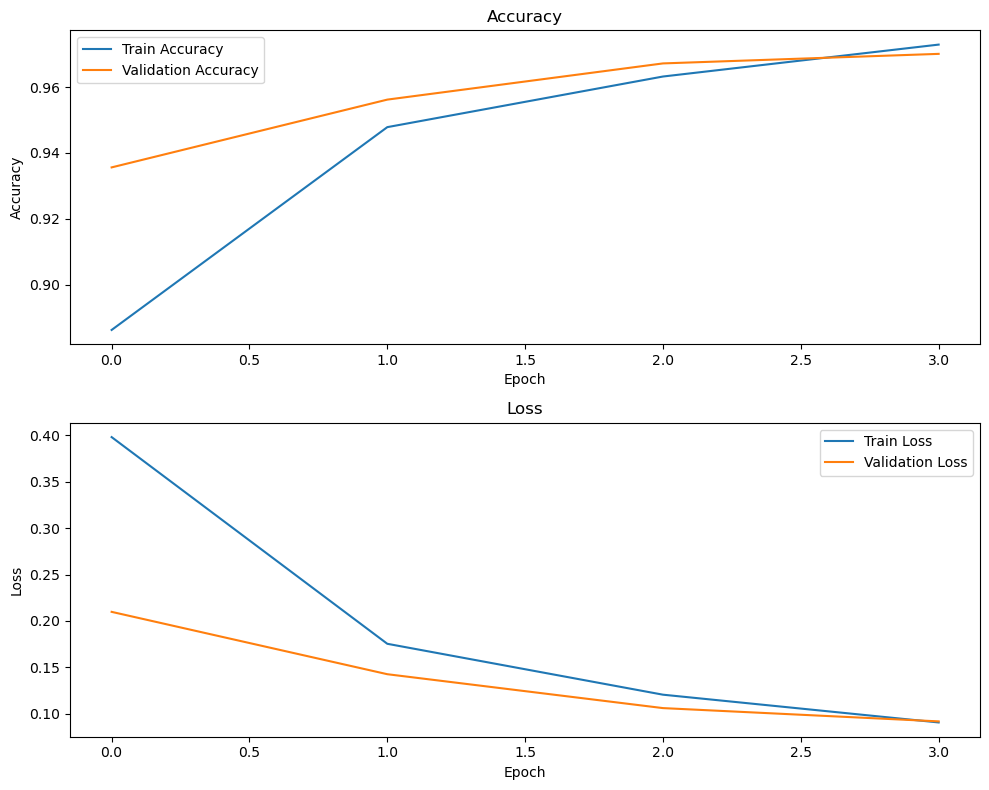

313/313 - 2s - loss: 0.0915 - accuracy: 0.9701 - 2s/epoch - 6ms/step
Test accuracy: 97.01%
1875/1875 - 11s - loss: 0.0718 - accuracy: 0.9784 - 11s/epoch - 6ms/step
Train accuracy: 97.84%


2024/04/13 20:08:20 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/4
1875/1875 [==============================] - 15s 7ms/step - loss: 2.9103 - accuracy: 0.1029 - val_loss: 2.7516 - val_accuracy: 0.1010
Epoch 2/4
1875/1875 [==============================] - 13s 7ms/step - loss: 2.9392 - accuracy: 0.1005 - val_loss: 2.8551 - val_accuracy: 0.0980
Epoch 3/4
1875/1875 [==============================] - 13s 7ms/step - loss: 2.8837 - accuracy: 0.1035 - val_loss: 3.0945 - val_accuracy: 0.0982
Epoch 4/4
1875/1875 [==============================] - 12s 7ms/step - loss: 2.9070 - accuracy: 0.1007 - val_loss: 3.1539 - val_accuracy: 0.0974


<Figure size 640x480 with 0 Axes>

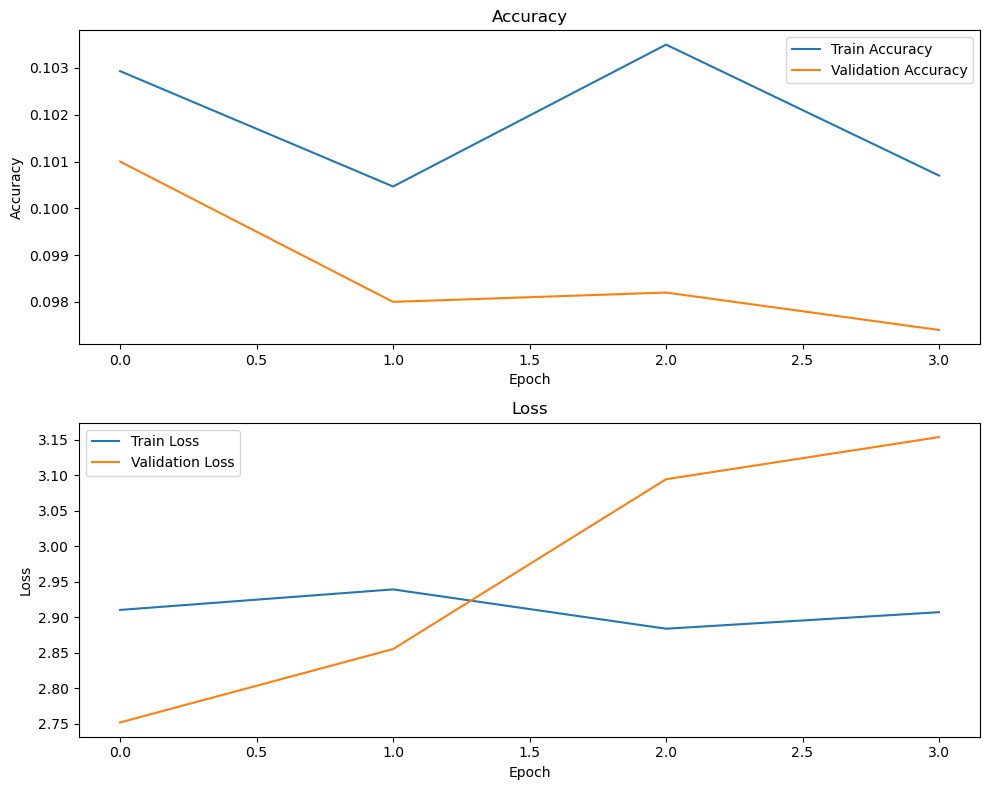

313/313 - 2s - loss: 3.1539 - accuracy: 0.0974 - 2s/epoch - 5ms/step
Test accuracy:  9.74%
1875/1875 - 8s - loss: 3.1462 - accuracy: 0.0975 - 8s/epoch - 5ms/step
Train accuracy:  9.75%


2024/04/13 20:10:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 20)                15700     
                                                                 
 dense_58 (Dense)            (None, 10)                210       
                                                                 
 dense_59 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
1875/1875 [==============================] - 15s 7ms/step - loss: 1.2745 - accuracy: 0.6374 - val_loss: 0.5721 - val_accuracy: 0.8667
Epoch 2/4
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4492 - accuracy: 0.8879 - val_loss: 0.3644 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

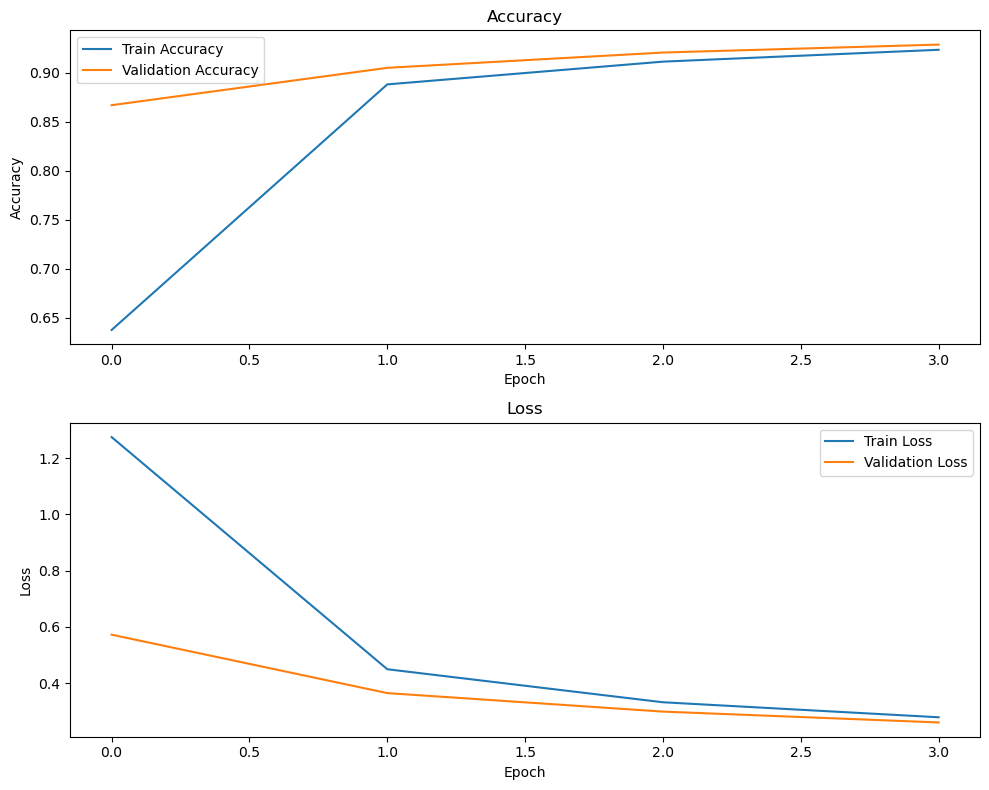

313/313 - 1s - loss: 0.2600 - accuracy: 0.9285 - 1s/epoch - 5ms/step
Test accuracy: 92.85%
1875/1875 - 8s - loss: 0.2539 - accuracy: 0.9295 - 8s/epoch - 5ms/step
Train accuracy: 92.95%


2024/04/13 20:12:11 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                15700     
                                                                 
 dense_61 (Dense)            (None, 10)                210       
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
1875/1875 [==============================] - 14s 7ms/step - loss: 2.3694 - accuracy: 0.1124 - val_loss: 2.3671 - val_accuracy: 0.1135
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3683 - accuracy: 0.1124 - val_loss: 2.3660 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

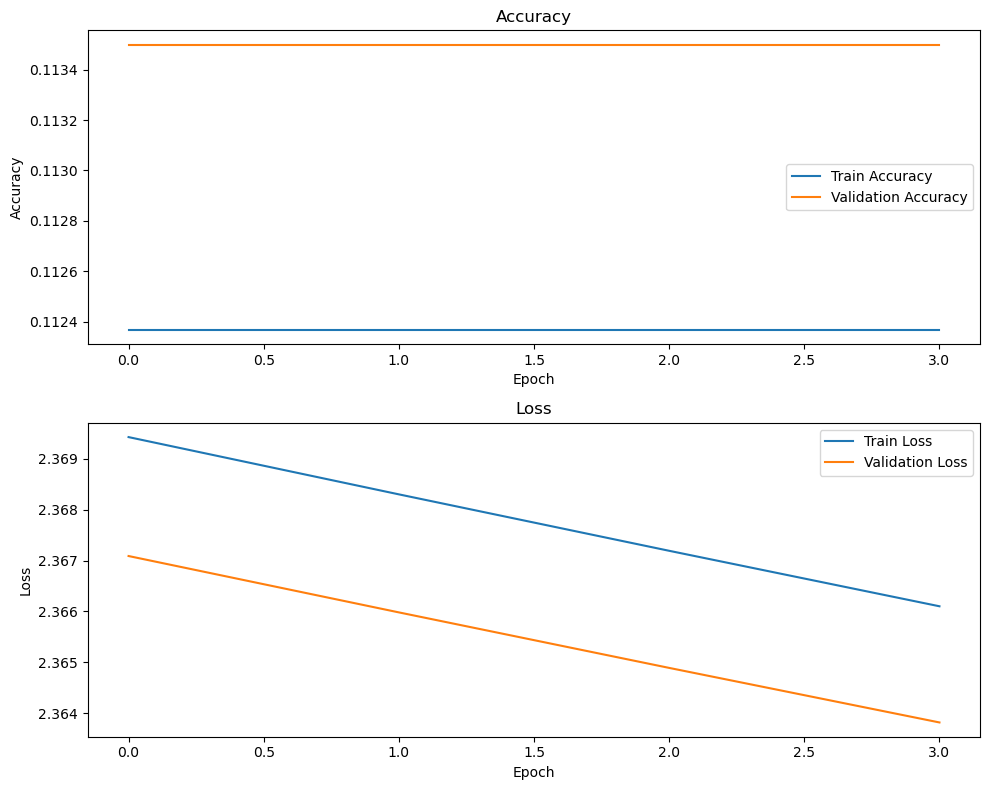

313/313 - 1s - loss: 2.3638 - accuracy: 0.1135 - 1s/epoch - 5ms/step
Test accuracy: 11.35%
1875/1875 - 9s - loss: 2.3656 - accuracy: 0.1124 - 9s/epoch - 5ms/step
Train accuracy: 11.24%


2024/04/13 20:14:04 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 20)                15700     
                                                                 
 dense_64 (Dense)            (None, 10)                210       
                                                                 
 dense_65 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
1875/1875 [==============================] - 15s 7ms/step - loss: 2.1783 - accuracy: 0.3524 - val_loss: 1.9544 - val_accuracy: 0.4889
Epoch 2/4
1875/1875 [==============================] - 12s 7ms/step - loss: 1.6423 - accuracy: 0.5735 - val_loss: 1.3703 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

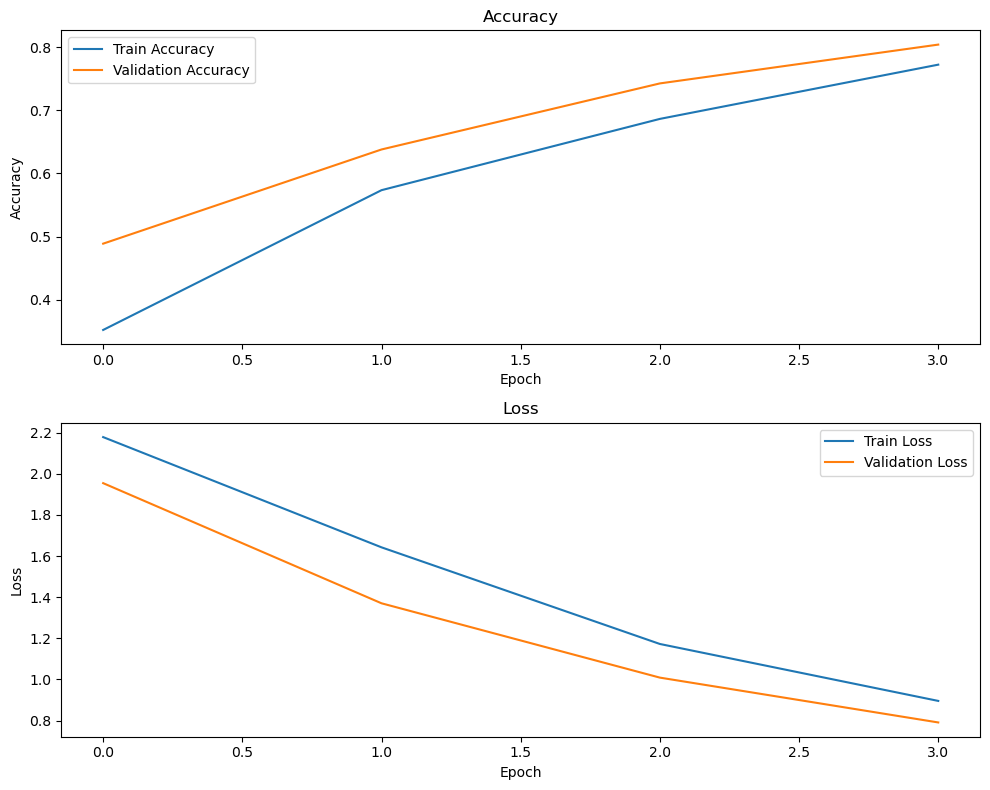

313/313 - 2s - loss: 0.7909 - accuracy: 0.8038 - 2s/epoch - 5ms/step
Test accuracy: 80.38%
1875/1875 - 9s - loss: 0.7961 - accuracy: 0.7977 - 9s/epoch - 5ms/step
Train accuracy: 79.77%


2024/04/13 20:15:59 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 20)                15700     
                                                                 
 dense_67 (Dense)            (None, 10)                210       
                                                                 
 dense_68 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
118/118 [==============================] - 4s 17ms/step - loss: 2.1075 - accuracy: 0.3123 - val_loss: 1.9020 - val_accuracy: 0.5399
Epoch 2/4
118/118 [==============================] - 1s 11ms/step - loss: 1.7628 - accuracy: 0.5730 - val_loss: 1.6091 - val_accuracy: 0.61

<Figure size 640x480 with 0 Axes>

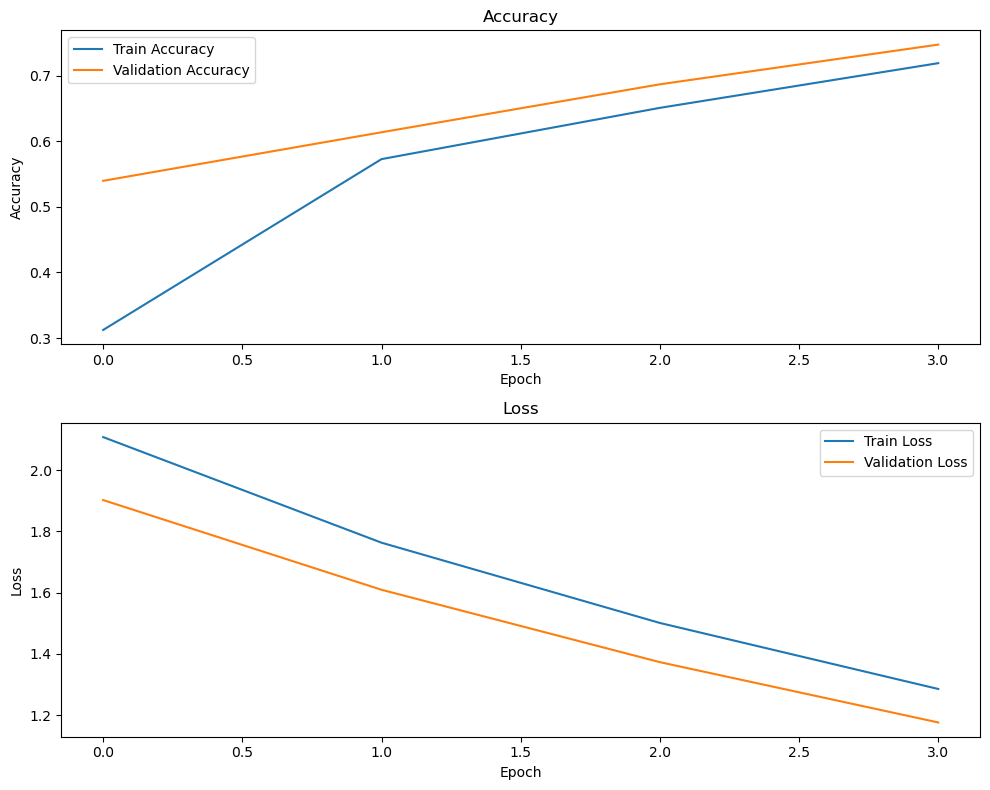

313/313 - 2s - loss: 1.1758 - accuracy: 0.7478 - 2s/epoch - 5ms/step
Test accuracy: 74.78%
1875/1875 - 9s - loss: 1.1872 - accuracy: 0.7438 - 9s/epoch - 5ms/step
Train accuracy: 74.38%


2024/04/13 20:17:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


<Figure size 640x480 with 0 Axes>

In [7]:
#Manual logging all the models
#Autologging all models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from tensorflow.keras.layers import Dropout


with mlflow.start_run(run_name="Main_Run_mauallog") as main_run:
    main_run_id = main_run.info.run_id
    
    # Start sub-experiment
    with mlflow.start_run(run_name="Sub_Run_1", nested=True) as sub_run:
        epoch=4
        config = {'hidden_layers': [20, 10]}
        # Log network configuration
        
        model1 = keras.Sequential()
        model1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model1.add(layers.Dense(20, activation='sigmoid'))
        model1.add(layers.Dense(10, activation='softmax'))
        model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history1 = model1.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history1)
        mlflow.log_figure(plt.gcf(), "training_history.png")

        test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model1.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model1"
        
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model1,artifact_path)
    
    with mlflow.start_run(run_name="Sub_Run_2", nested=True) as sub_run:
        epoch = 4
        config = {'hidden_layers': [256, 128]}
        model2 = keras.Sequential()
        model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model2.add(layers.Dense(128, activation='sigmoid'))
        model2.add(layers.Dense(10, activation='softmax'))
        model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history2 = model2.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history2)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model2.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model2"
        
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model2,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_3", nested=True) as sub_run:
  
        epoch= 4
        stepsperepoch = 5
        regularization = 0.1
        config = {'hidden_layers': [256, 128]}
        model3 = keras.Sequential()
        model3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(10, activation='softmax'))
        model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history3 = model3.fit(x_train, y_train, epochs=epoch, steps_per_epoch=stepsperepoch, validation_data=(x_test, y_test))
        show_history(history3)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model3.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model3"
        
        mlflow.log_params({"steps_per_epoch":stepsperepoch}) 
        mlflow.log_params({"regularization":regularization}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model3,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_4", nested=True) as sub_run:
      
        epoch = 5
        dropout_1 = 0.5
        dropout_2 = 0.7
        config = {'hidden_layers': [256, 128]}
        model4 = keras.Sequential()
        model4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model4.add(Dropout(dropout_1))
        model4.add(layers.Dense(128, activation='sigmoid'))
        model4.add(Dropout(dropout_2))
        model4.add(layers.Dense(10, activation='softmax'))
        model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history4 = model4.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history4)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model4.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model4"
        
        mlflow.log_params({"dropout_1":dropout_1}) 
        mlflow.log_params({"dropout_2":dropout_2}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model4,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_5", nested=True) as sub_run:
        
        min_delta=0.1
        patience=3
        epoch = 5
        config = {'hidden_layers': [256, 128]}
        model5 = keras.Sequential()
        model5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model5.add(layers.Dense(128, activation='sigmoid'))
        model5.add(layers.Dense(10, activation='softmax'))
        model5.summary()
        model5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
        es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=min_delta, patience=patience)
        history5=model5.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), callbacks=[es])
        show_history(history5)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model5.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model5.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model5"
        
        mlflow.log_params({"min_delta":min_delta})
        mlflow.log_params({"patience":patience})
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model5,artifact_path)
        
        
        
    with mlflow.start_run(run_name="Sub_Run_6", nested=True) as sub_run:
     
        epoch = 4
        learning = 15
        config = {'hidden_layers': [20,10]}
        model6 = keras.Sequential()
        model6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model6.add(layers.Dense(10, activation='sigmoid'))
        model6.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history6= model6.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history6)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model6.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model6.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model6"
        
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model6,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_7", nested=True) as sub_run:
    
        epoch = 4
        learning = 0.1
        config = {'hidden_layers': [20,10]}
        model7 = keras.Sequential()
        model7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model7.add(layers.Dense(10, activation='sigmoid'))
        model7.add(layers.Dense(10, activation='softmax'))
        model7.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history7= model7.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history7)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model7.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model7.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model7"
        
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model7,artifact_path)
     
    with mlflow.start_run(run_name="Sub_Run_8", nested=True) as sub_run:
 
        epoch = 4
        learning = 0.00001
        config = {'hidden_layers': [20,10]}
        model8 = keras.Sequential()
        model8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model8.add(layers.Dense(10, activation='sigmoid'))
        model8.add(layers.Dense(10, activation='softmax'))
        model8.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history8= model8.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history8)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model8.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model8.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model8"
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model8,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_9", nested=True) as sub_run:
    
        epoch = 4
        learning = 0.01
        momentum=0.5
        config = {'hidden_layers': [20,10]}
        model9 = keras.Sequential()
        model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model9.add(layers.Dense(10, activation='sigmoid'))
        model9.add(layers.Dense(10, activation='softmax'))
        model9.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history9)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model9.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model9"
        
        mlflow.log_params({"learning":learning})
        mlflow.log_params({"momentum":momentum}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model9,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_10", nested=True) as sub_run:
        
        epoch = 4
        batch=512
        learning = 0.01
        momentum=0.5
        config = {'hidden_layers': [20,10]}
        model10 = keras.Sequential()
        model10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model10.add(layers.Dense(10, activation='sigmoid'))
        model10.add(layers.Dense(10, activation='softmax'))
        model10.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model10.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history10=model10.fit(x_train, y_train, batch_size=batch, epochs=epoch ,validation_data=(x_test, y_test))
        show_history(history10)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model10.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model10.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model10"
        
        mlflow.log_params({"learning":learning})
        mlflow.log_params({"momentum":momentum})
        mlflow.log_params({"batch":batch})
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model10,artifact_path)



Epoch 1/6
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0112 - accuracy: 0.7497 - val_loss: 0.4416 - val_accuracy: 0.8840
Epoch 2/6
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3538 - accuracy: 0.9021 - val_loss: 0.2901 - val_accuracy: 0.9203
Epoch 3/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2661 - accuracy: 0.9238 - val_loss: 0.2405 - val_accuracy: 0.9314
Epoch 4/6
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2253 - accuracy: 0.9355 - val_loss: 0.2157 - val_accuracy: 0.9373
Epoch 5/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2000 - accuracy: 0.9423 - val_loss: 0.1977 - val_accuracy: 0.9414
Epoch 6/6
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1833 - accuracy: 0.9471 - val_loss: 0.1840 - val_accuracy: 0.9445


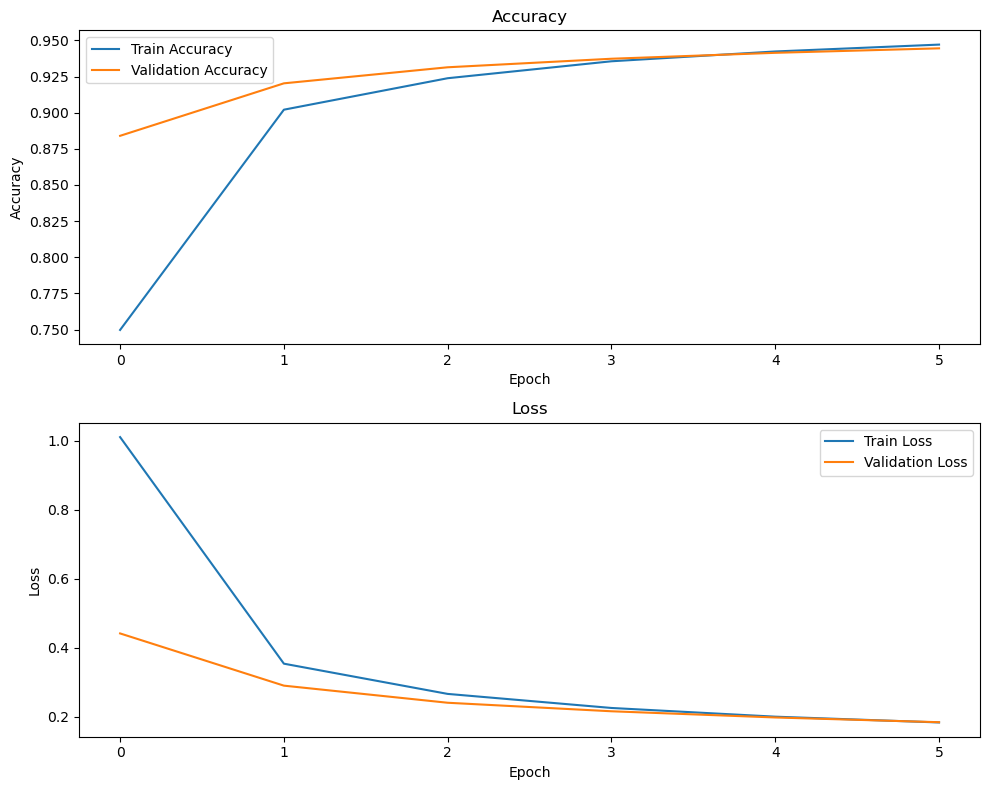

313/313 - 2s - loss: 0.1840 - accuracy: 0.9445 - 2s/epoch - 5ms/step
Test accuracy: 94.45%
1875/1875 - 9s - loss: 0.1694 - accuracy: 0.9511 - 9s/epoch - 5ms/step
Train accuracy: 95.11%


2024/04/13 20:21:31 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/6
1875/1875 [==============================] - 25s 12ms/step - loss: 0.4008 - accuracy: 0.8876 - val_loss: 0.2193 - val_accuracy: 0.9338
Epoch 2/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1758 - accuracy: 0.9466 - val_loss: 0.1509 - val_accuracy: 0.9543
Epoch 3/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1217 - accuracy: 0.9628 - val_loss: 0.1098 - val_accuracy: 0.9658
Epoch 4/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0923 - accuracy: 0.9714 - val_loss: 0.0944 - val_accuracy: 0.9708
Epoch 5/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0726 - accuracy: 0.9772 - val_loss: 0.0826 - val_accuracy: 0.9741
Epoch 6/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0777 - val_accuracy: 0.9758


<Figure size 640x480 with 0 Axes>

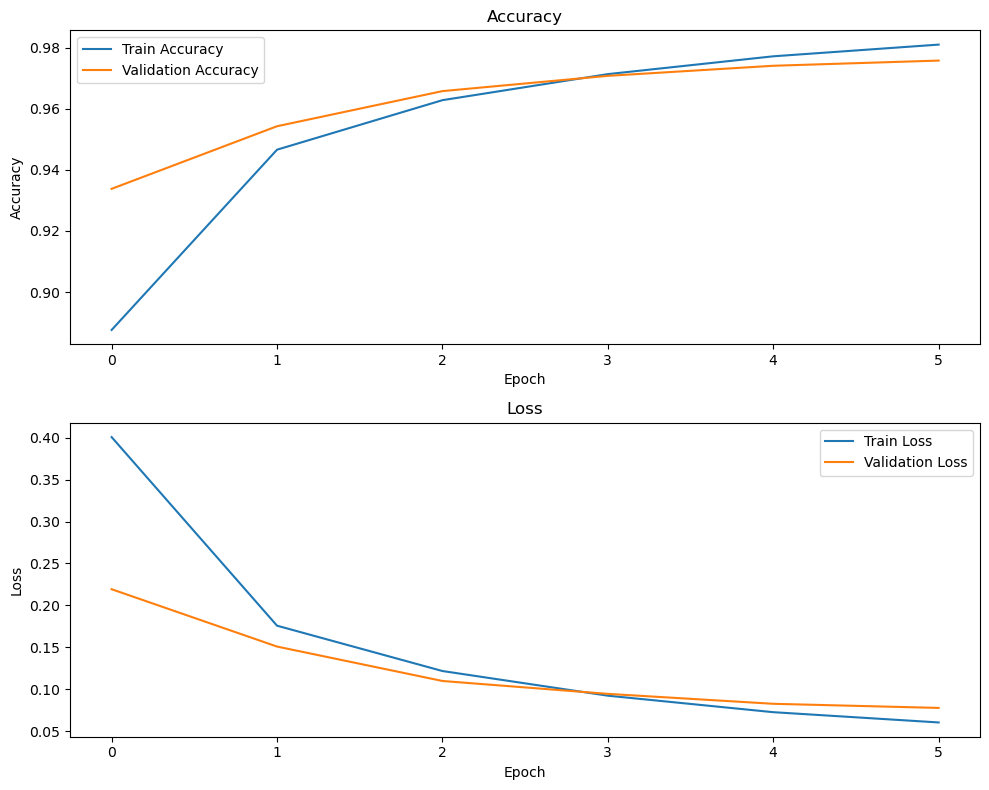

313/313 - 2s - loss: 0.0777 - accuracy: 0.9758 - 2s/epoch - 6ms/step
Test accuracy: 97.58%
1875/1875 - 11s - loss: 0.0457 - accuracy: 0.9862 - 11s/epoch - 6ms/step
Train accuracy: 98.62%


2024/04/13 20:24:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/6
6/6 [==============================] - 5s 630ms/step - loss: 7.1452 - accuracy: 0.2375 - val_loss: 6.2980 - val_accuracy: 0.5316
Epoch 2/6
6/6 [==============================] - 3s 500ms/step - loss: 5.8931 - accuracy: 0.4902 - val_loss: 5.3877 - val_accuracy: 0.4848
Epoch 3/6
6/6 [==============================] - 3s 517ms/step - loss: 5.0965 - accuracy: 0.5036 - val_loss: 4.7146 - val_accuracy: 0.4002
Epoch 4/6
6/6 [==============================] - 3s 503ms/step - loss: 4.4868 - accuracy: 0.5117 - val_loss: 4.1795 - val_accuracy: 0.4889
Epoch 5/6
6/6 [==============================] - 3s 498ms/step - loss: 3.9961 - accuracy: 0.5093 - val_loss: 3.7430 - val_accuracy: 0.5990
Epoch 6/6
6/6 [==============================] - 3s 497ms/step - loss: 3.5961 - accuracy: 0.4972 - val_loss: 3.3862 - val_accuracy: 0.5745


<Figure size 640x480 with 0 Axes>

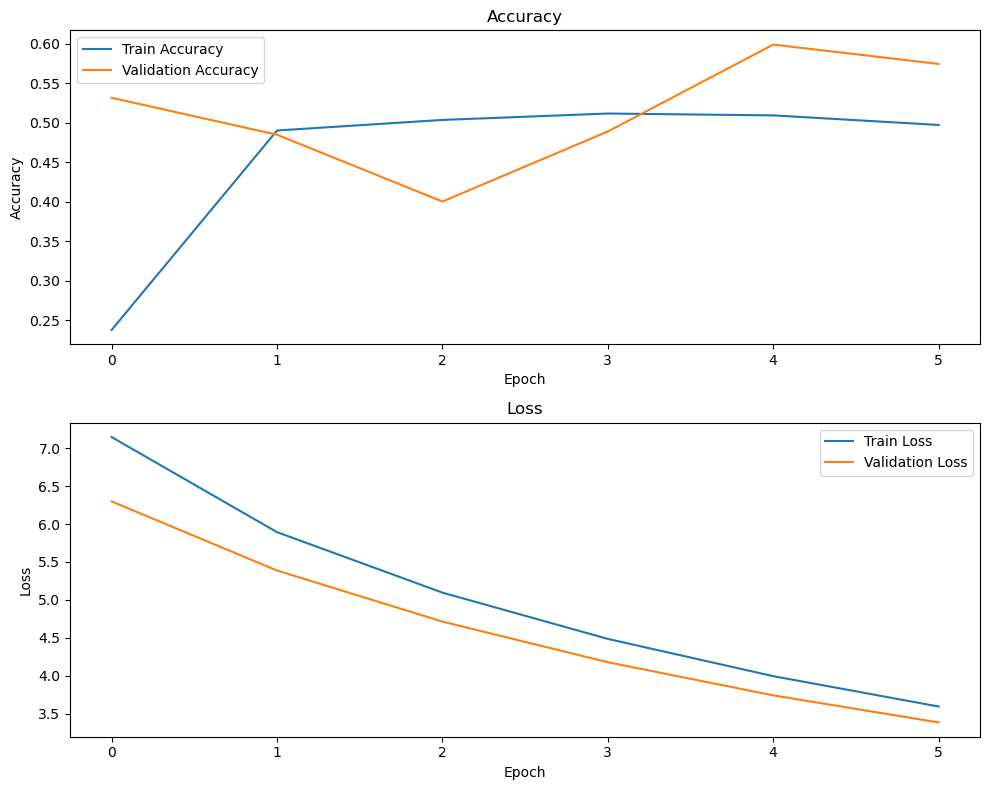

313/313 - 2s - loss: 3.3862 - accuracy: 0.5745 - 2s/epoch - 6ms/step
Test accuracy: 57.45%
1875/1875 - 11s - loss: 3.3919 - accuracy: 0.5630 - 11s/epoch - 6ms/step
Train accuracy: 56.30%


2024/04/13 20:26:12 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/6
1875/1875 [==============================] - 26s 13ms/step - loss: 1.4588 - accuracy: 0.4746 - val_loss: 0.4744 - val_accuracy: 0.8752
Epoch 2/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8949 - accuracy: 0.6979 - val_loss: 0.3534 - val_accuracy: 0.9032
Epoch 3/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8093 - accuracy: 0.7375 - val_loss: 0.3085 - val_accuracy: 0.9151
Epoch 4/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7606 - accuracy: 0.7587 - val_loss: 0.2884 - val_accuracy: 0.9239
Epoch 5/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7258 - accuracy: 0.7734 - val_loss: 0.2675 - val_accuracy: 0.9292
Epoch 6/6
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7026 - accuracy: 0.7854 - val_loss: 0.2578 - val_accuracy: 0.9338


<Figure size 640x480 with 0 Axes>

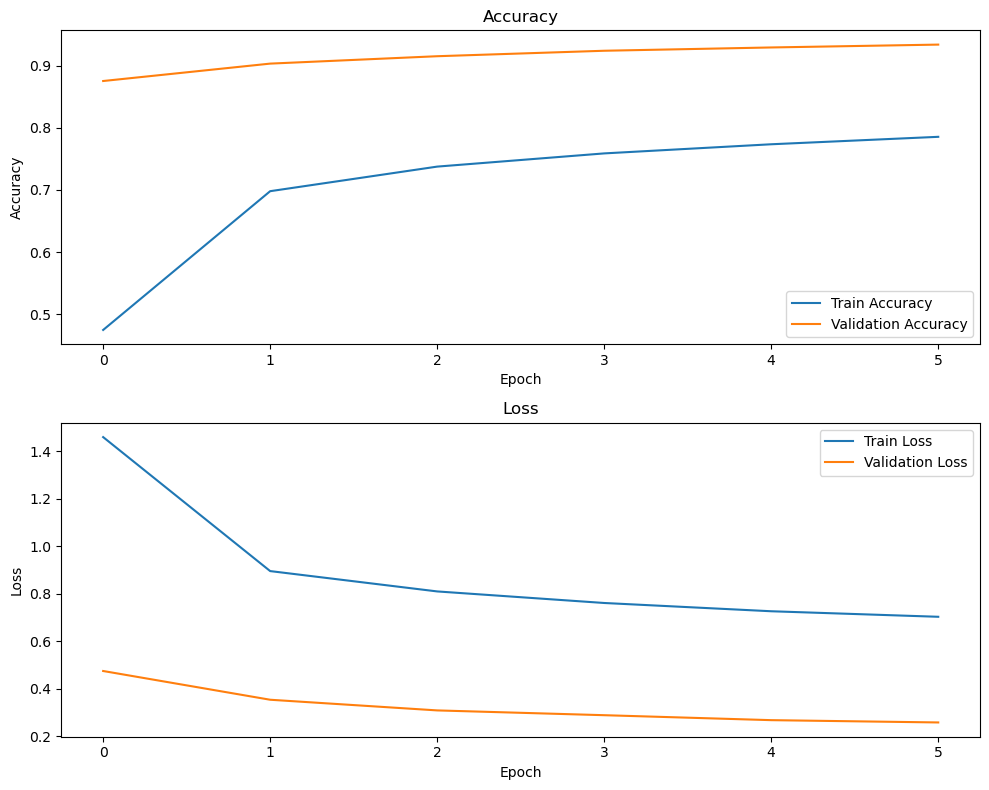

313/313 - 2s - loss: 0.2578 - accuracy: 0.9338 - 2s/epoch - 6ms/step
Test accuracy: 93.38%
1875/1875 - 10s - loss: 0.2580 - accuracy: 0.9336 - 10s/epoch - 6ms/step
Train accuracy: 93.36%


2024/04/13 20:29:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 256)               200960    
                                                                 
 dense_82 (Dense)            (None, 128)               32896     
                                                                 
 dense_83 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4058 - accuracy: 0.8856 - val_loss: 0.2088 - val_accuracy: 0.9383
Epoch 2/6
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1727 - accuracy: 0.9485 - val_loss: 0.1382 - val_accu

<Figure size 640x480 with 0 Axes>

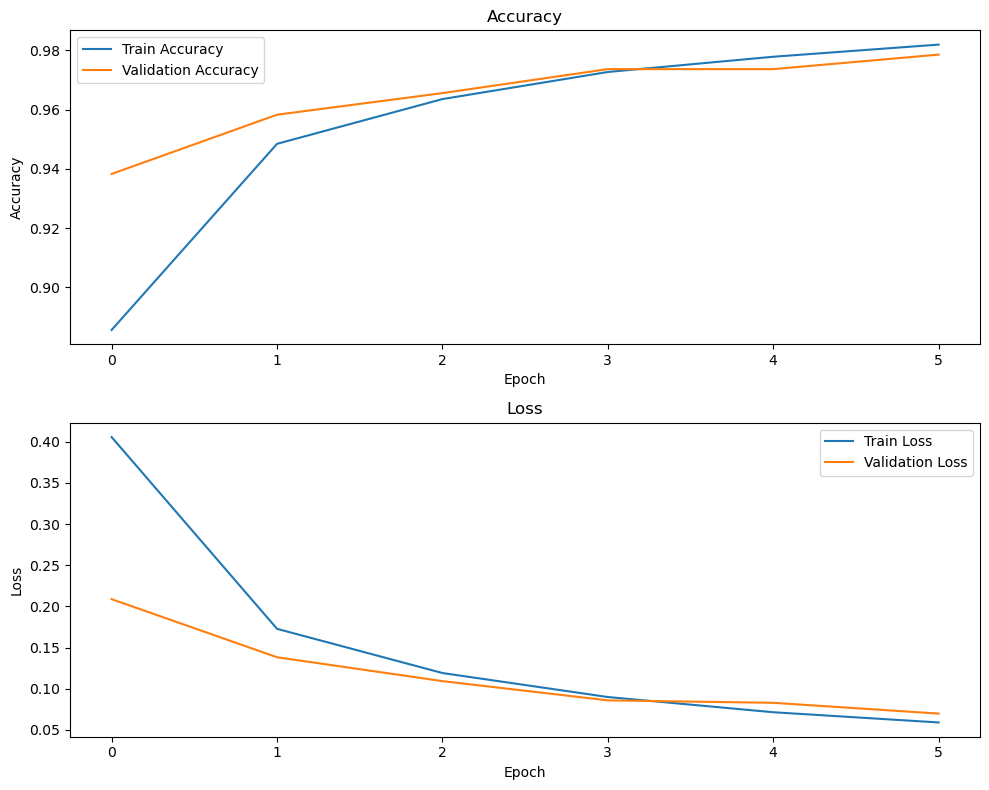

313/313 - 2s - loss: 0.0697 - accuracy: 0.9786 - 2s/epoch - 6ms/step
Test accuracy: 97.86%
1875/1875 - 11s - loss: 0.0422 - accuracy: 0.9875 - 11s/epoch - 6ms/step
Train accuracy: 98.75%


2024/04/13 20:32:53 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5345 - accuracy: 0.8395 - val_loss: 0.3658 - val_accuracy: 0.8983
Epoch 2/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3625 - accuracy: 0.9006 - val_loss: 0.3474 - val_accuracy: 0.9051
Epoch 3/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3230 - accuracy: 0.9114 - val_loss: 0.3190 - val_accuracy: 0.9164
Epoch 4/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3022 - accuracy: 0.9182 - val_loss: 0.3005 - val_accuracy: 0.9226
Epoch 5/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2850 - accuracy: 0.9232 - val_loss: 0.2884 - val_accuracy: 0.9215
Epoch 6/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2879 - accuracy: 0.9228 - val_loss: 0.2874 - val_accuracy: 0.9254


<Figure size 640x480 with 0 Axes>

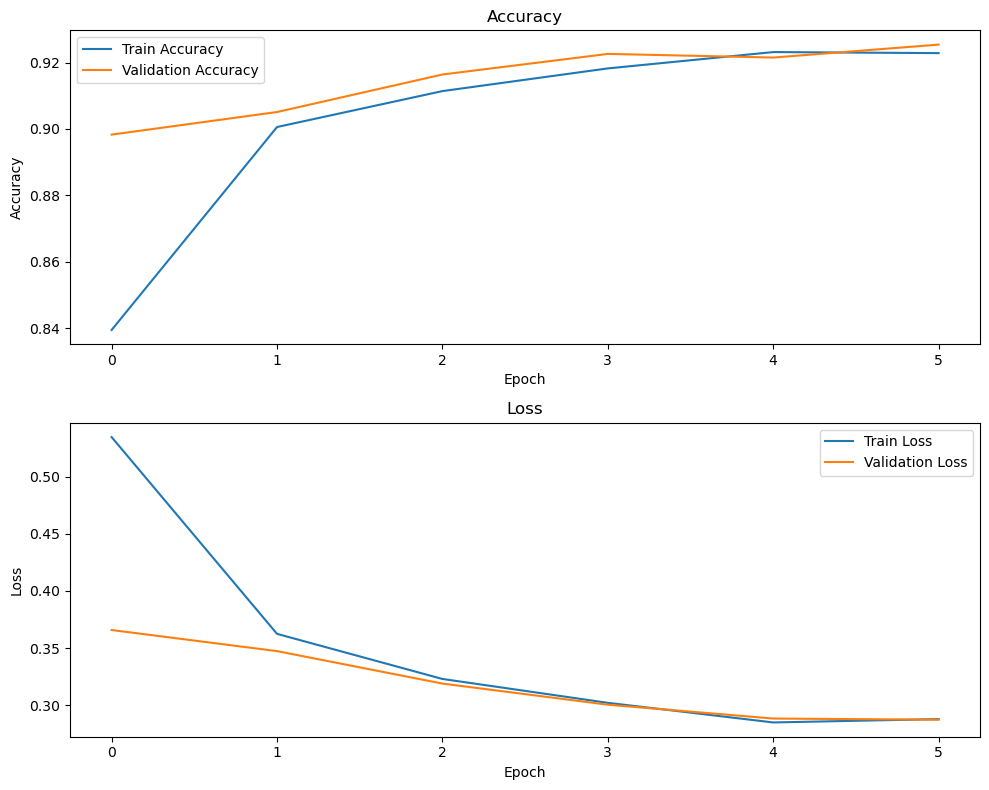

313/313 - 2s - loss: 0.2874 - accuracy: 0.9254 - 2s/epoch - 5ms/step
Test accuracy: 92.54%
1875/1875 - 8s - loss: 0.2556 - accuracy: 0.9317 - 8s/epoch - 5ms/step
Train accuracy: 93.17%


2024/04/13 20:35:15 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 20)                15700     
                                                                 
 dense_88 (Dense)            (None, 10)                210       
                                                                 
 dense_89 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 15s 7ms/step - loss: 2.2690 - accuracy: 0.2023 - val_loss: 2.2098 - val_accuracy: 0.3942
Epoch 2/6
1875/1875 [==============================] - 13s 7ms/step - loss: 2.1194 - accuracy: 0.4037 - val_loss: 1.9896 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

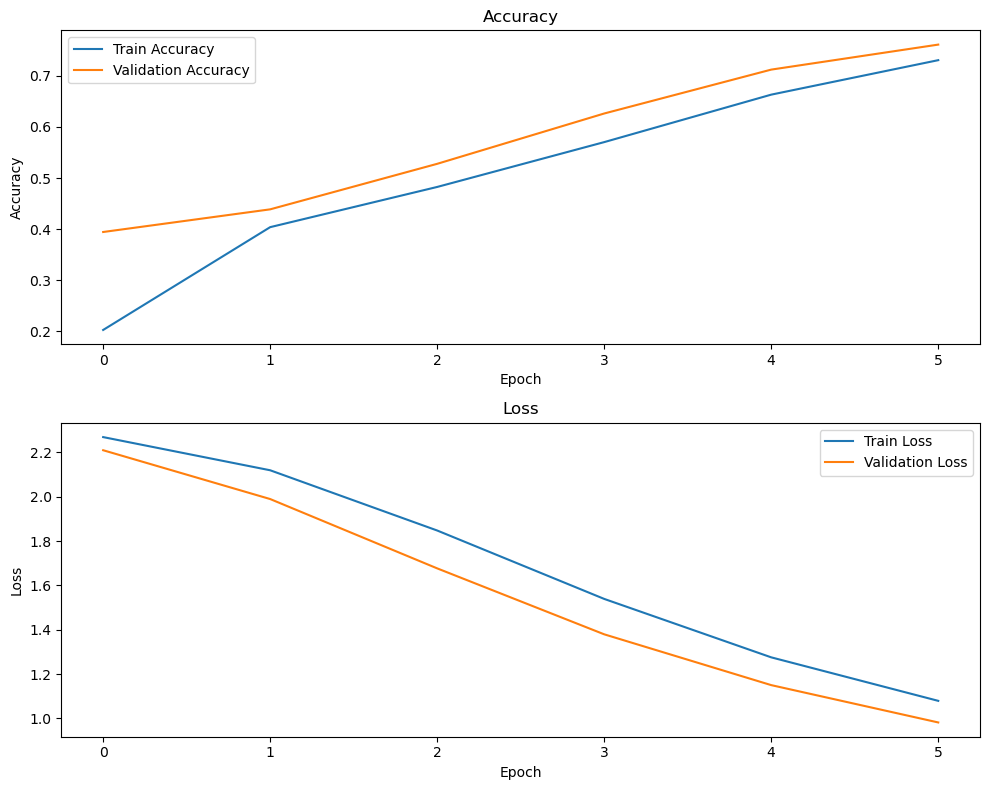

313/313 - 2s - loss: 0.9816 - accuracy: 0.7614 - 2s/epoch - 5ms/step
Test accuracy: 76.14%
1875/1875 - 9s - loss: 0.9989 - accuracy: 0.7563 - 9s/epoch - 5ms/step
Train accuracy: 75.63%


2024/04/13 20:37:34 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 20)                15700     
                                                                 
 dense_91 (Dense)            (None, 10)                210       
                                                                 
 dense_92 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 15s 7ms/step - loss: 0.9971 - accuracy: 0.7266 - val_loss: 0.4464 - val_accuracy: 0.8841
Epoch 2/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3698 - accuracy: 0.9024 - val_loss: 0.3049 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

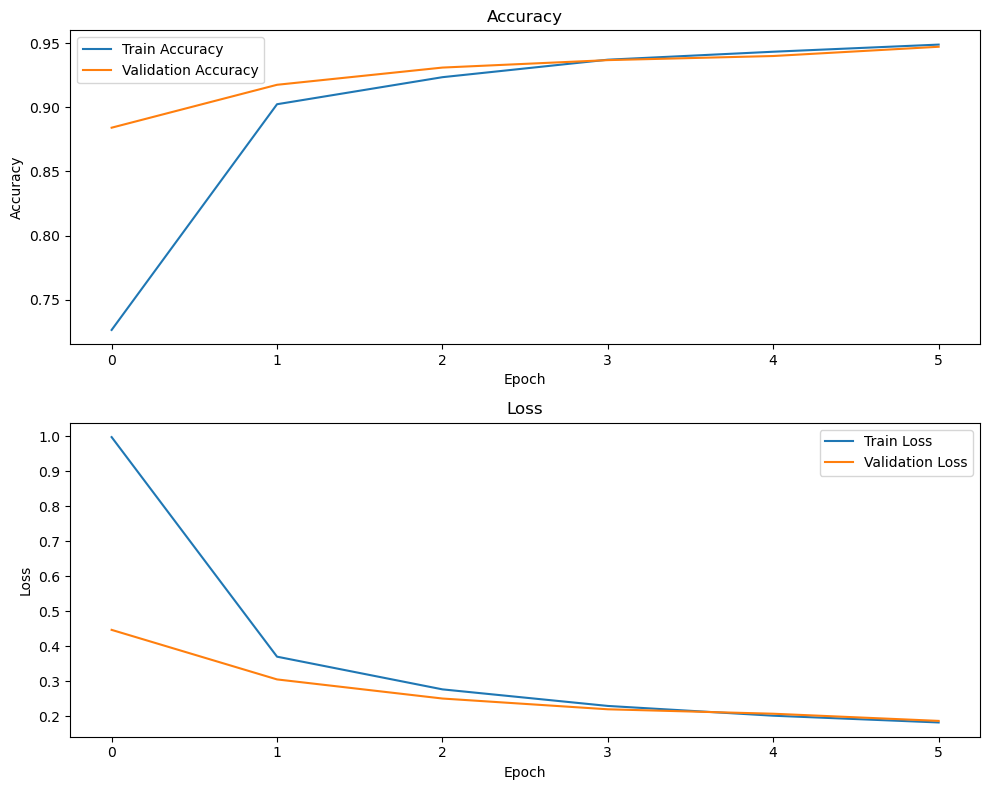

313/313 - 1s - loss: 0.1864 - accuracy: 0.9471 - 1s/epoch - 5ms/step
Test accuracy: 94.71%
1875/1875 - 9s - loss: 0.1654 - accuracy: 0.9543 - 9s/epoch - 5ms/step
Train accuracy: 95.43%


2024/04/13 20:39:53 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 20)                15700     
                                                                 
 dense_94 (Dense)            (None, 10)                210       
                                                                 
 dense_95 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4671 - accuracy: 0.8605 - val_loss: 0.2344 - val_accuracy: 0.9325
Epoch 2/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2165 - accuracy: 0.9360 - val_loss: 0.2078 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

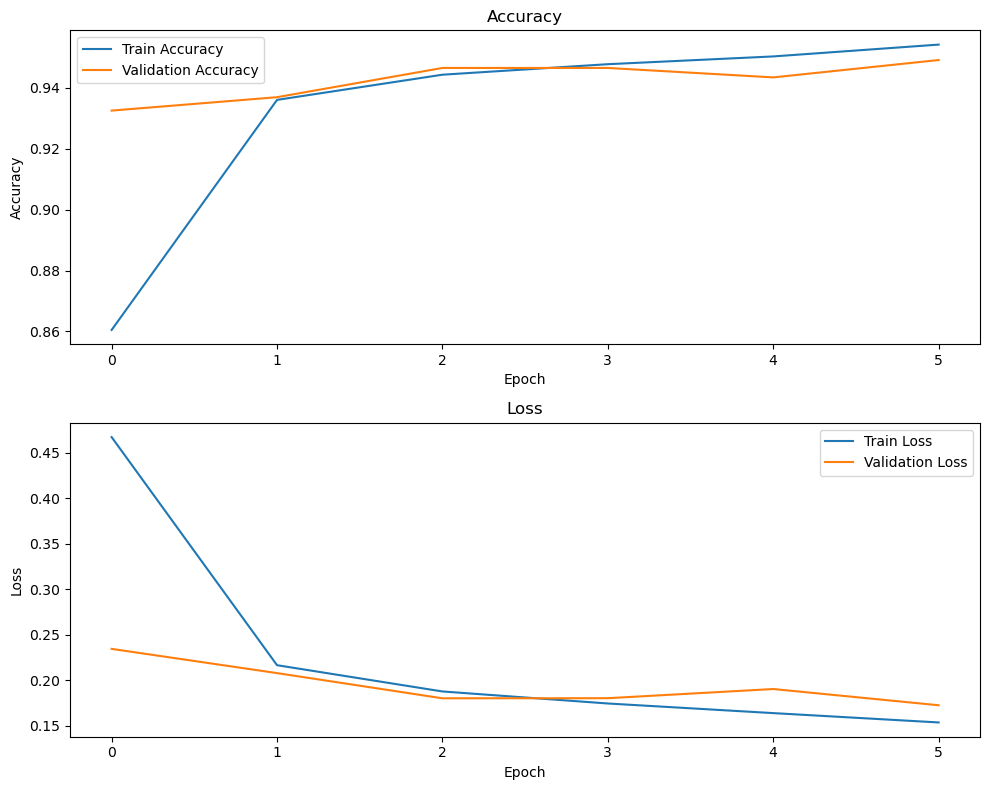

313/313 - 2s - loss: 0.1725 - accuracy: 0.9491 - 2s/epoch - 6ms/step
Test accuracy: 94.91%
1875/1875 - 11s - loss: 0.1445 - accuracy: 0.9566 - 11s/epoch - 6ms/step
Train accuracy: 95.66%


2024/04/13 20:42:14 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 20)                15700     
                                                                 
 dense_97 (Dense)            (None, 10)                210       
                                                                 
 dense_98 (Dense)            (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
2143/2143 [==============================] - 18s 7ms/step - loss: 1.1163 - accuracy: 0.7466 - val_loss: 0.5503 - val_accuracy: 0.8802
Epoch 2/6
2143/2143 [==============================] - 15s 7ms/step - loss: 0.4242 - accuracy: 0.8947 - val_loss: 0.3354 - val_accuracy: 

<Figure size 640x480 with 0 Axes>

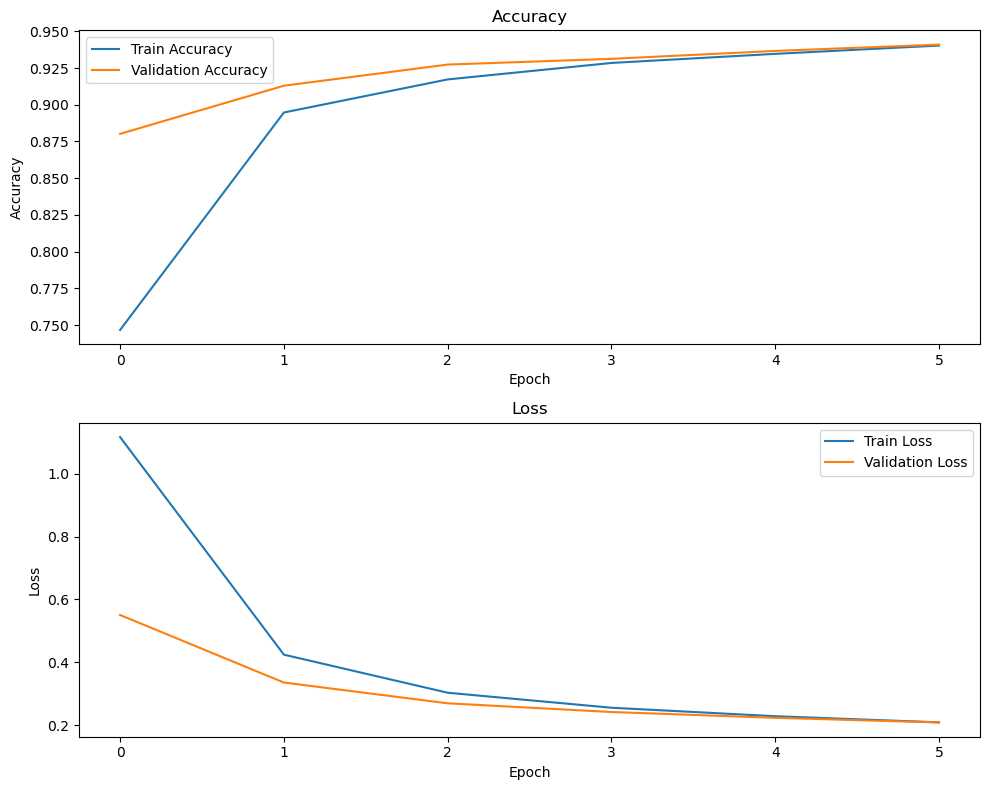

313/313 - 2s - loss: 0.2085 - accuracy: 0.9410 - 2s/epoch - 5ms/step
Test accuracy: 94.10%
1875/1875 - 9s - loss: 0.1938 - accuracy: 0.9441 - 9s/epoch - 5ms/step
Train accuracy: 94.41%


2024/04/13 20:44:59 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


<Figure size 640x480 with 0 Axes>

In [8]:
#Manual logging all the models
#Autologging all models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from tensorflow.keras.layers import Dropout


with mlflow.start_run(run_name="Main_Run_mauallog_2") as main_run:
    main_run_id = main_run.info.run_id
    
    # Start sub-experiment
    with mlflow.start_run(run_name="Sub_Run_1", nested=True) as sub_run:
        epoch=6
        config = {'hidden_layers': [20, 10]}
        # Log network configuration
        
        model1 = keras.Sequential()
        model1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model1.add(layers.Dense(20, activation='sigmoid'))
        model1.add(layers.Dense(10, activation='softmax'))
        model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history1 = model1.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history1)
        mlflow.log_figure(plt.gcf(), "training_history.png")

        test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model1.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model1"
        
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model1,artifact_path)
    
    with mlflow.start_run(run_name="Sub_Run_2", nested=True) as sub_run:
        epoch = 6
        config = {'hidden_layers': [256, 128]}
        model2 = keras.Sequential()
        model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model2.add(layers.Dense(128, activation='sigmoid'))
        model2.add(layers.Dense(10, activation='softmax'))
        model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history2 = model2.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history2)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model2.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model2"
        
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model2,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_3", nested=True) as sub_run:
  
        epoch= 6
        stepsperepoch = 6
        regularization = 0.01
        config = {'hidden_layers': [256, 128]}
        model3 = keras.Sequential()
        model3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(10, activation='softmax'))
        model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history3 = model3.fit(x_train, y_train, epochs=epoch, steps_per_epoch=stepsperepoch, validation_data=(x_test, y_test))
        show_history(history3)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model3.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model3"
        
        mlflow.log_params({"steps_per_epoch":stepsperepoch}) 
        mlflow.log_params({"regularization":regularization}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model3,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_4", nested=True) as sub_run:
      
        epoch = 6
        dropout_1 = 0.6
        dropout_2 = 0.9
        config = {'hidden_layers': [256, 128]}
        model4 = keras.Sequential()
        model4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model4.add(Dropout(dropout_1))
        model4.add(layers.Dense(128, activation='sigmoid'))
        model4.add(Dropout(dropout_2))
        model4.add(layers.Dense(10, activation='softmax'))
        model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history4 = model4.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history4)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model4.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model4"
        
        mlflow.log_params({"dropout_1":dropout_1}) 
        mlflow.log_params({"dropout_2":dropout_2}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model4,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_5", nested=True) as sub_run:
        
        min_delta=0.001
        patience=6
        epoch = 6
        config = {'hidden_layers': [256, 128]}
        model5 = keras.Sequential()
        model5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model5.add(layers.Dense(128, activation='sigmoid'))
        model5.add(layers.Dense(10, activation='softmax'))
        model5.summary()
        model5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
        es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=min_delta, patience=patience)
        history5=model5.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), callbacks=[es])
        show_history(history5)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model5.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model5.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model5"
        
        mlflow.log_params({"min_delta":min_delta})
        mlflow.log_params({"patience":patience})
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model5,artifact_path)
        
        
        
    with mlflow.start_run(run_name="Sub_Run_6", nested=True) as sub_run:
     
        epoch = 6
        learning = 5
        config = {'hidden_layers': [20,10]}
        model6 = keras.Sequential()
        model6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model6.add(layers.Dense(10, activation='sigmoid'))
        model6.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history6= model6.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history6)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model6.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model6.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model6"
        
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model6,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_7", nested=True) as sub_run:
    
        epoch = 6
        learning = 0.01
        config = {'hidden_layers': [20,10]}
        model7 = keras.Sequential()
        model7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model7.add(layers.Dense(10, activation='sigmoid'))
        model7.add(layers.Dense(10, activation='softmax'))
        model7.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history7= model7.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history7)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model7.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model7.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model7"
        
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model7,artifact_path)
     
    with mlflow.start_run(run_name="Sub_Run_8", nested=True) as sub_run:
 
        epoch = 6
        learning = 0.15
        config = {'hidden_layers': [20,10]}
        model8 = keras.Sequential()
        model8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model8.add(layers.Dense(10, activation='sigmoid'))
        model8.add(layers.Dense(10, activation='softmax'))
        model8.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history8= model8.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history8)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model8.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model8.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model8"
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model8,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_9", nested=True) as sub_run:
    
        epoch = 6
        learning = 0.1
        momentum=0.9
        config = {'hidden_layers': [20,10]}
        model9 = keras.Sequential()
        model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model9.add(layers.Dense(10, activation='sigmoid'))
        model9.add(layers.Dense(10, activation='softmax'))
        model9.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history9)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model9.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model9"
        
        mlflow.log_params({"learning":learning})
        mlflow.log_params({"momentum":momentum}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model9,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_10", nested=True) as sub_run:
        
        epoch = 6
        batch=28
        learning = 0.1
        momentum=0.9
        config = {'hidden_layers': [20,10]}
        model10 = keras.Sequential()
        model10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model10.add(layers.Dense(10, activation='sigmoid'))
        model10.add(layers.Dense(10, activation='softmax'))
        model10.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model10.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history10=model10.fit(x_train, y_train, batch_size=batch, epochs=epoch ,validation_data=(x_test, y_test))
        show_history(history10)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model10.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model10.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model10"
        
        mlflow.log_params({"learning":learning})
        mlflow.log_params({"momentum":momentum})
        mlflow.log_params({"batch":batch})
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model10,artifact_path)



Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9557 - accuracy: 0.7710 - val_loss: 0.4128 - val_accuracy: 0.8916
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3464 - accuracy: 0.9032 - val_loss: 0.2970 - val_accuracy: 0.9129
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2725 - accuracy: 0.9225 - val_loss: 0.2483 - val_accuracy: 0.9288
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2363 - accuracy: 0.9327 - val_loss: 0.2223 - val_accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2132 - accuracy: 0.9378 - val_loss: 0.2092 - val_accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1968 - accuracy: 0.9428 - val_loss: 0.1940 - val_accuracy: 0.9435
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1835 - accuracy: 0.9466 - val_loss: 0.1876 - val_ac

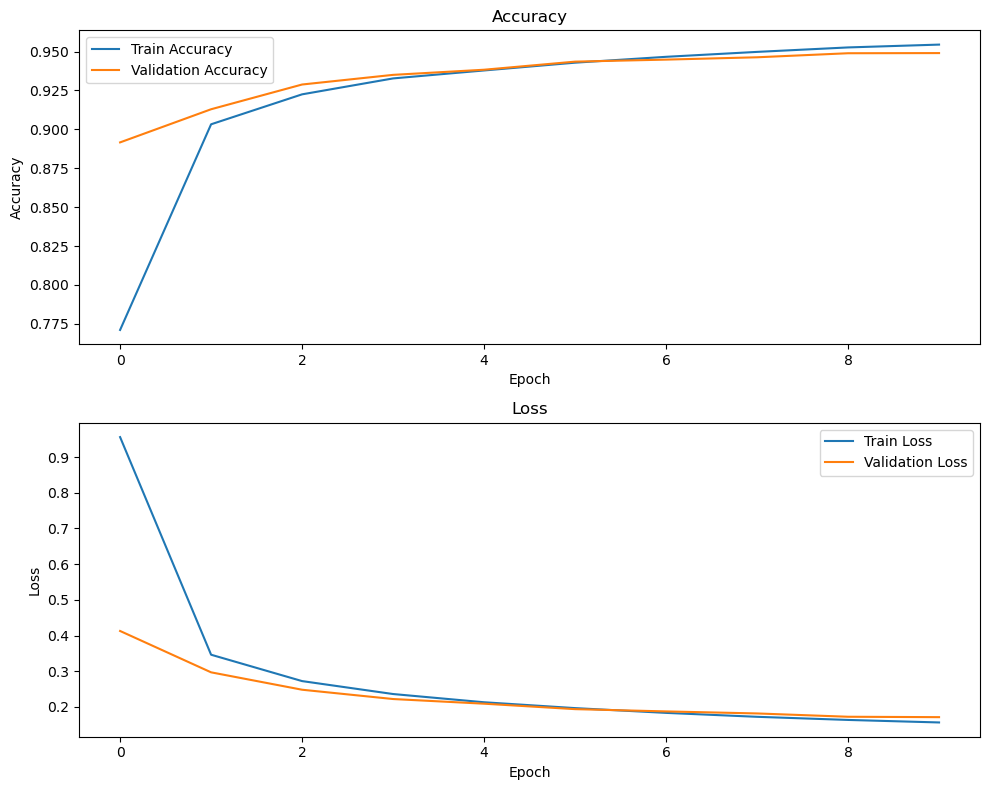

313/313 - 2s - loss: 0.1715 - accuracy: 0.9490 - 2s/epoch - 5ms/step
Test accuracy: 94.90%
1875/1875 - 9s - loss: 0.1503 - accuracy: 0.9560 - 9s/epoch - 5ms/step
Train accuracy: 95.60%


2024/04/13 20:49:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4008 - accuracy: 0.8867 - val_loss: 0.2080 - val_accuracy: 0.9365
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1731 - accuracy: 0.9479 - val_loss: 0.1355 - val_accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1195 - accuracy: 0.9633 - val_loss: 0.1095 - val_accuracy: 0.9652
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0902 - accuracy: 0.9723 - val_loss: 0.0902 - val_accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.0827 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.0753 - val_accuracy: 0.9763
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0489 - accuracy: 0.9853 - val_loss: 0.0798 -

<Figure size 640x480 with 0 Axes>

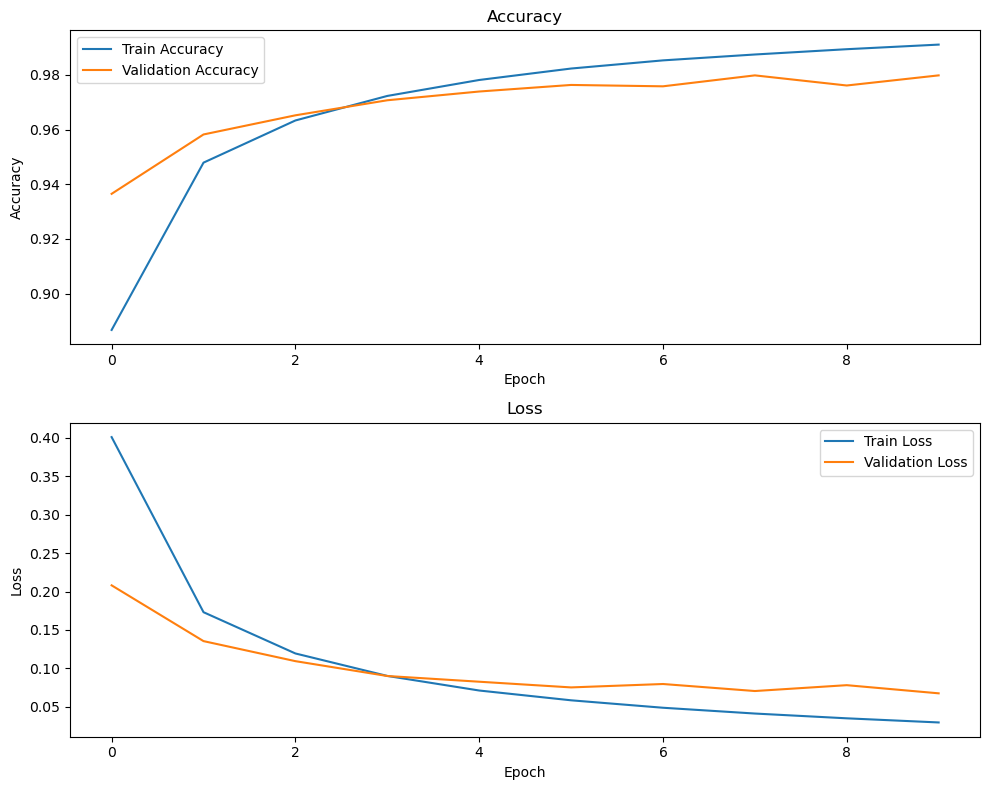

313/313 - 2s - loss: 0.0676 - accuracy: 0.9798 - 2s/epoch - 8ms/step
Test accuracy: 97.98%
1875/1875 - 11s - loss: 0.0202 - accuracy: 0.9938 - 11s/epoch - 6ms/step
Train accuracy: 99.38%


2024/04/13 20:55:04 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 2.9803 - accuracy: 0.1604 - val_loss: 2.7622 - val_accuracy: 0.3184
Epoch 2/10
4/4 [==============================] - 3s 806ms/step - loss: 2.7244 - accuracy: 0.4523 - val_loss: 2.6604 - val_accuracy: 0.5603
Epoch 3/10
4/4 [==============================] - 3s 798ms/step - loss: 2.6248 - accuracy: 0.5652 - val_loss: 2.5559 - val_accuracy: 0.7050
Epoch 4/10
4/4 [==============================] - 3s 843ms/step - loss: 2.5164 - accuracy: 0.6428 - val_loss: 2.4373 - val_accuracy: 0.6492
Epoch 5/10
4/4 [==============================] - 3s 837ms/step - loss: 2.3998 - accuracy: 0.6322 - val_loss: 2.3153 - val_accuracy: 0.6491
Epoch 6/10
4/4 [==============================] - 3s 845ms/step - loss: 2.2738 - accuracy: 0.6706 - val_loss: 2.1827 - val_accuracy: 0.6930
Epoch 7/10
4/4 [==============================] - 3s 856ms/step - loss: 2.1449 - accuracy: 0.7021 - val_loss: 2.0542 - val_accuracy: 0.7135
Epoch 8/10
4/4 [=======

<Figure size 640x480 with 0 Axes>

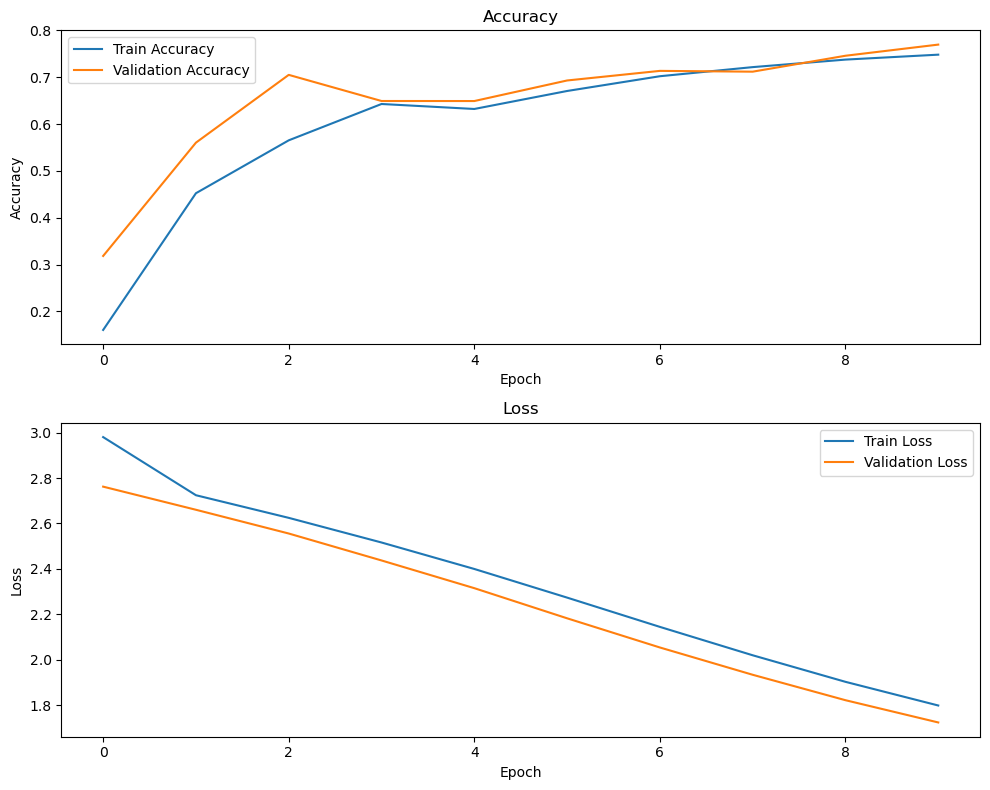

313/313 - 2s - loss: 1.7242 - accuracy: 0.7696 - 2s/epoch - 6ms/step
Test accuracy: 76.96%
1875/1875 - 12s - loss: 1.7380 - accuracy: 0.7595 - 12s/epoch - 6ms/step
Train accuracy: 75.95%


2024/04/13 20:56:42 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10
1875/1875 [==============================] - 27s 13ms/step - loss: 0.8874 - accuracy: 0.7085 - val_loss: 0.2911 - val_accuracy: 0.9148
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4582 - accuracy: 0.8704 - val_loss: 0.2289 - val_accuracy: 0.9322
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3755 - accuracy: 0.8955 - val_loss: 0.1900 - val_accuracy: 0.9442
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3414 - accuracy: 0.9076 - val_loss: 0.1722 - val_accuracy: 0.9521
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3046 - accuracy: 0.9175 - val_loss: 0.1595 - val_accuracy: 0.9526
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2824 - accuracy: 0.9261 - val_loss: 0.1531 - val_accuracy: 0.9586
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2697 - accuracy: 0.9303 - val_loss: 0.1422 -

<Figure size 640x480 with 0 Axes>

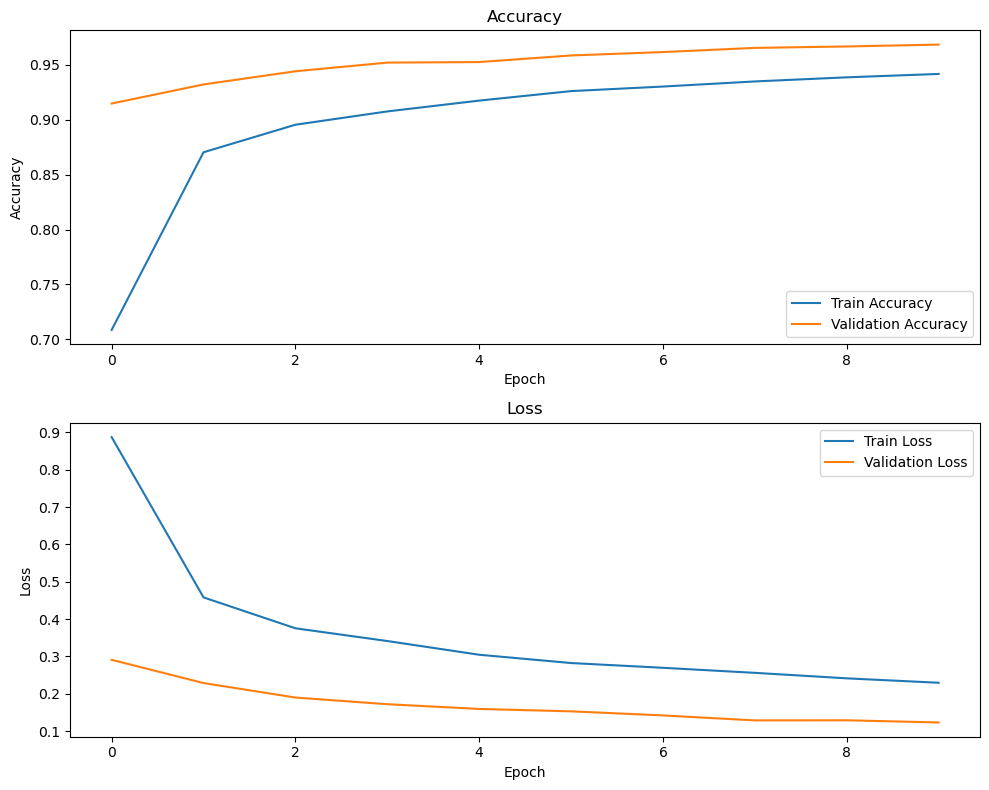

313/313 - 2s - loss: 0.1233 - accuracy: 0.9685 - 2s/epoch - 7ms/step
Test accuracy: 96.85%
1875/1875 - 12s - loss: 0.1028 - accuracy: 0.9739 - 12s/epoch - 6ms/step
Train accuracy: 97.39%


2024/04/13 21:01:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 256)               200960    
                                                                 
 dense_112 (Dense)           (None, 128)               32896     
                                                                 
 dense_113 (Dense)           (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3995 - accuracy: 0.8871 - val_loss: 0.1992 - val_accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1702 - accuracy: 0.9490 - val_loss: 0.1360 - val_ac

<Figure size 640x480 with 0 Axes>

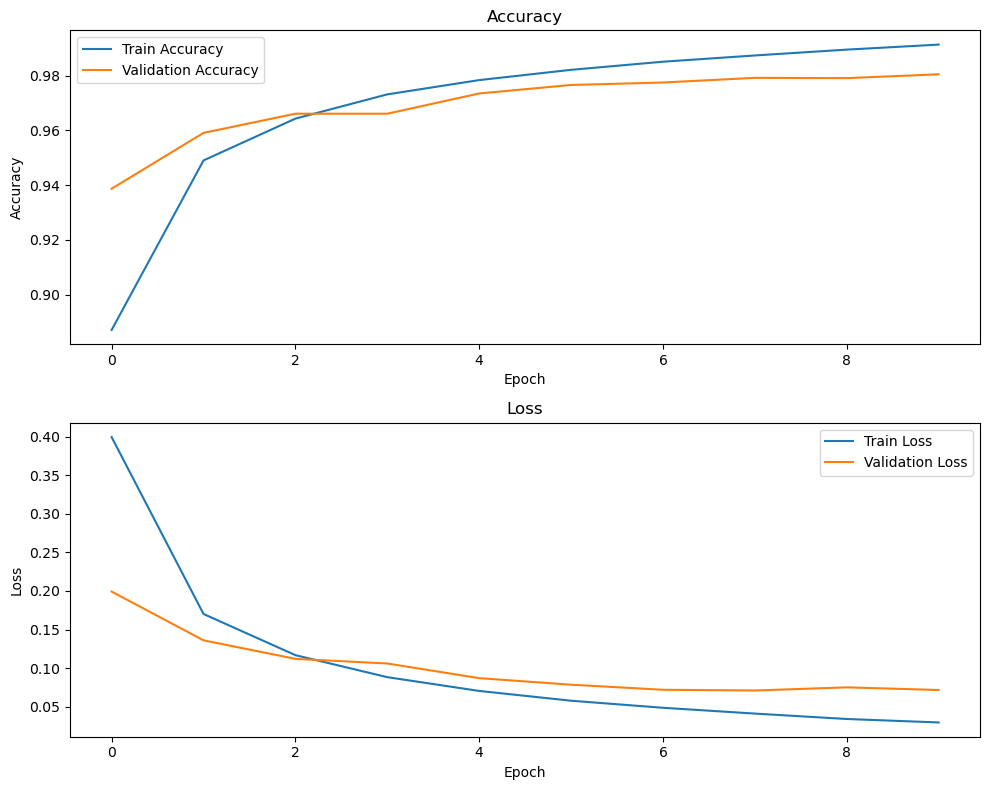

313/313 - 2s - loss: 0.0716 - accuracy: 0.9805 - 2s/epoch - 6ms/step
Test accuracy: 98.05%
1875/1875 - 12s - loss: 0.0209 - accuracy: 0.9939 - 12s/epoch - 6ms/step
Train accuracy: 99.39%


2024/04/13 21:07:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4334 - accuracy: 0.8665 - val_loss: 0.2639 - val_accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2444 - accuracy: 0.9291 - val_loss: 0.2382 - val_accuracy: 0.9323
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2139 - accuracy: 0.9374 - val_loss: 0.2721 - val_accuracy: 0.9243
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1948 - accuracy: 0.9416 - val_loss: 0.2135 - val_accuracy: 0.9407
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1883 - accuracy: 0.9442 - val_loss: 0.2176 - val_accuracy: 0.9379
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1800 - accuracy: 0.9468 - val_loss: 0.1969 - val_accuracy: 0.9439
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1683 - accuracy: 0.9503 - val_loss: 0.1990 - val_ac

<Figure size 640x480 with 0 Axes>

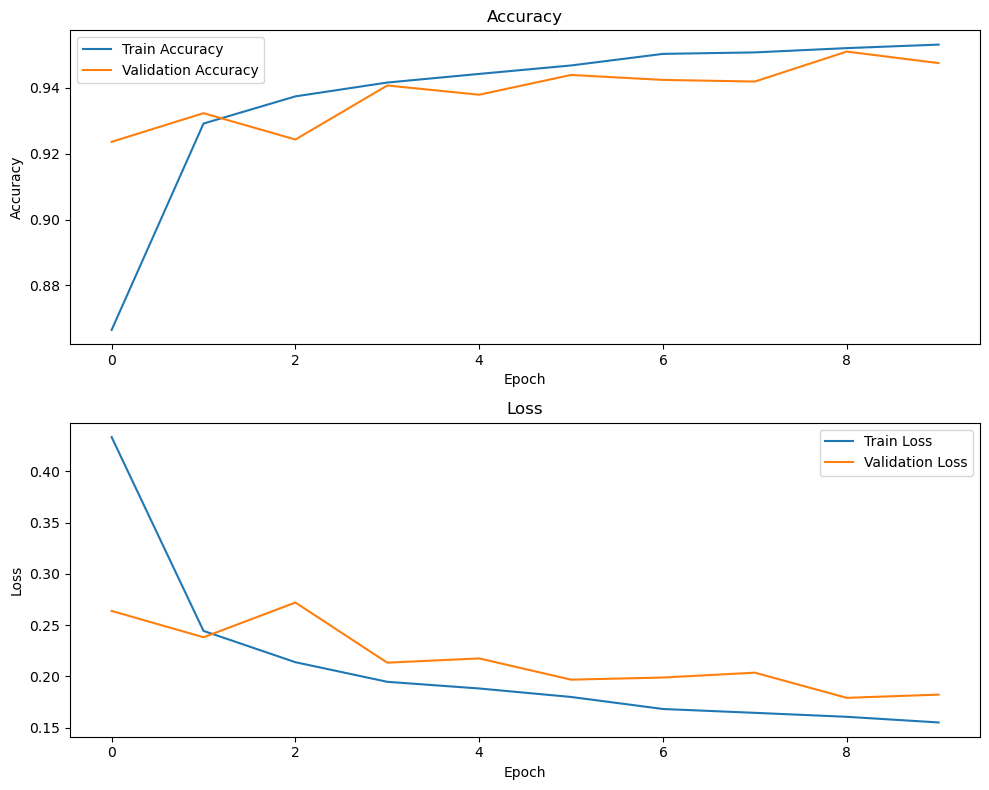

313/313 - 2s - loss: 0.1823 - accuracy: 0.9475 - 2s/epoch - 6ms/step
Test accuracy: 94.75%
1875/1875 - 10s - loss: 0.1379 - accuracy: 0.9584 - 10s/epoch - 5ms/step
Train accuracy: 95.84%


2024/04/13 21:10:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 20)                15700     
                                                                 
 dense_118 (Dense)           (None, 10)                210       
                                                                 
 dense_119 (Dense)           (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.2448 - accuracy: 0.6533 - val_loss: 0.6667 - val_accuracy: 0.8333
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5247 - accuracy: 0.8658 - val_loss: 0.4162 - val_accuracy

<Figure size 640x480 with 0 Axes>

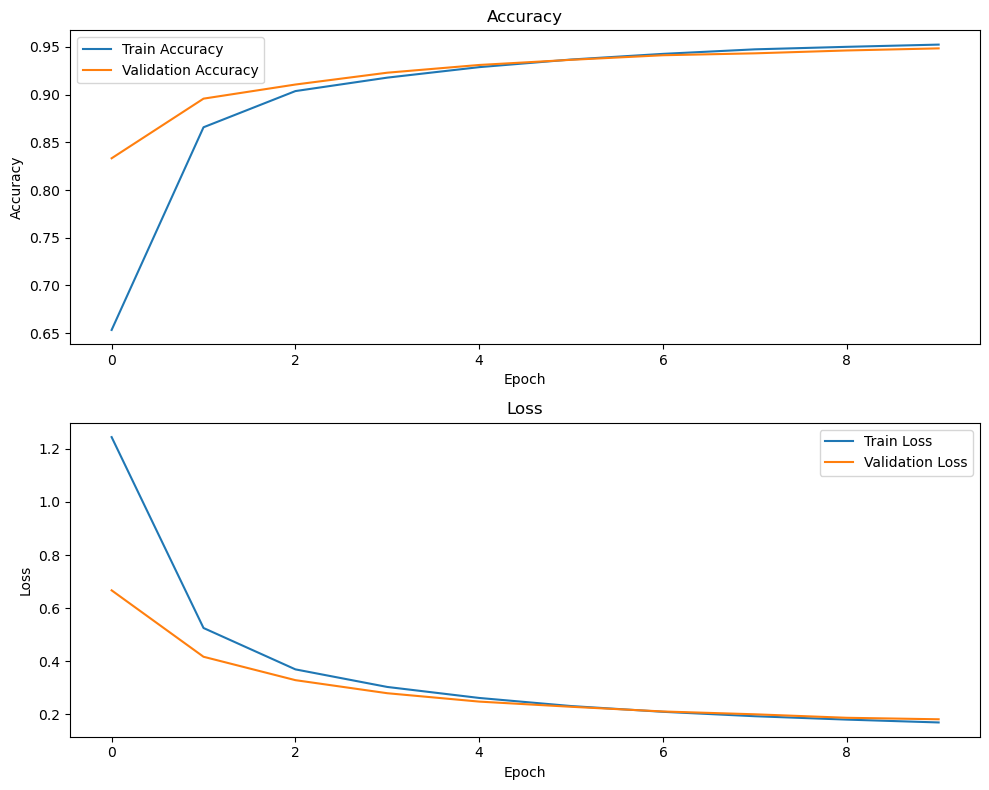

313/313 - 2s - loss: 0.1804 - accuracy: 0.9485 - 2s/epoch - 6ms/step
Test accuracy: 94.85%
1875/1875 - 10s - loss: 0.1591 - accuracy: 0.9563 - 10s/epoch - 5ms/step
Train accuracy: 95.63%


2024/04/13 21:14:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 20)                15700     
                                                                 
 dense_121 (Dense)           (None, 10)                210       
                                                                 
 dense_122 (Dense)           (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.7619 - accuracy: 0.4774 - val_loss: 1.1062 - val_accuracy: 0.7003
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8386 - accuracy: 0.7632 - val_loss: 0.6428 - val_accuracy

<Figure size 640x480 with 0 Axes>

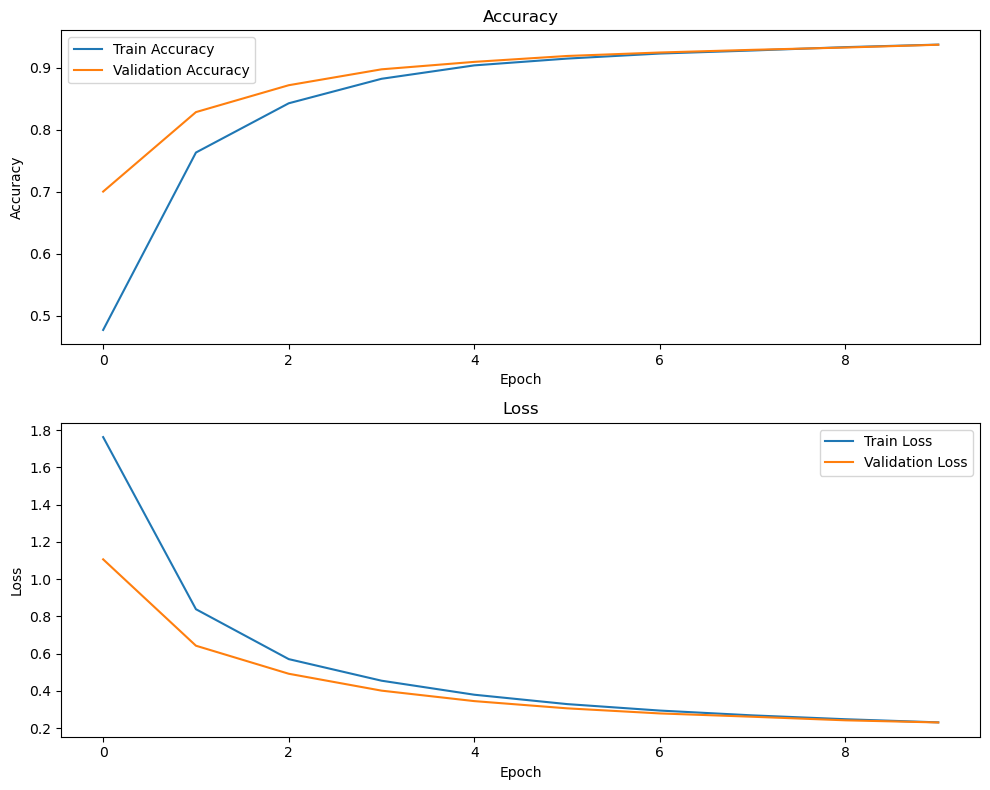

313/313 - 2s - loss: 0.2312 - accuracy: 0.9368 - 2s/epoch - 5ms/step
Test accuracy: 93.68%
1875/1875 - 9s - loss: 0.2212 - accuracy: 0.9401 - 9s/epoch - 5ms/step
Train accuracy: 94.01%


2024/04/13 21:18:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 20)                15700     
                                                                 
 dense_124 (Dense)           (None, 10)                210       
                                                                 
 dense_125 (Dense)           (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4363 - accuracy: 0.8673 - val_loss: 0.2567 - val_accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2151 - accuracy: 0.9365 - val_loss: 0.1947 - val_accuracy

<Figure size 640x480 with 0 Axes>

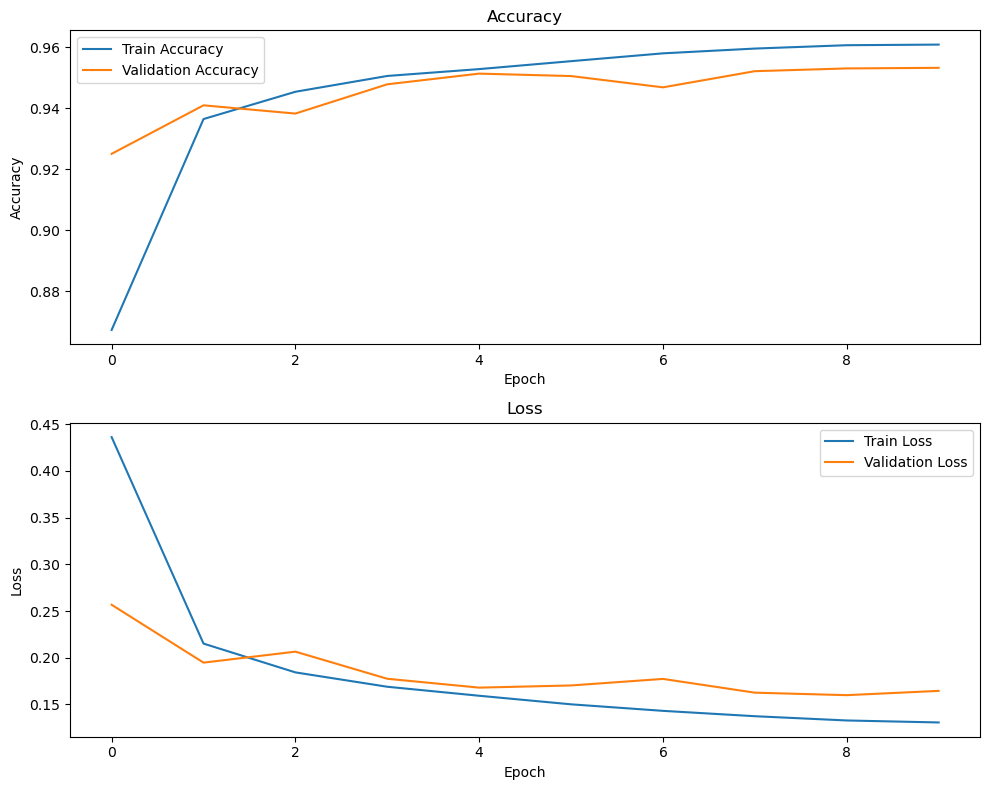

313/313 - 2s - loss: 0.1644 - accuracy: 0.9533 - 2s/epoch - 5ms/step
Test accuracy: 95.33%
1875/1875 - 9s - loss: 0.1173 - accuracy: 0.9645 - 9s/epoch - 5ms/step
Train accuracy: 96.45%


2024/04/13 21:21:43 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 20)                15700     
                                                                 
 dense_127 (Dense)           (None, 10)                210       
                                                                 
 dense_128 (Dense)           (None, 10)                110       
                                                                 
Total params: 16020 (62.58 KB)
Trainable params: 16020 (62.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 7s 10ms/step - loss: 1.8503 - accuracy: 0.5508 - val_loss: 1.4241 - val_accuracy: 0.7242
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 1.0967 - accuracy: 0.7952 - val_loss: 0.8192 - val_accuracy: 0.8

<Figure size 640x480 with 0 Axes>

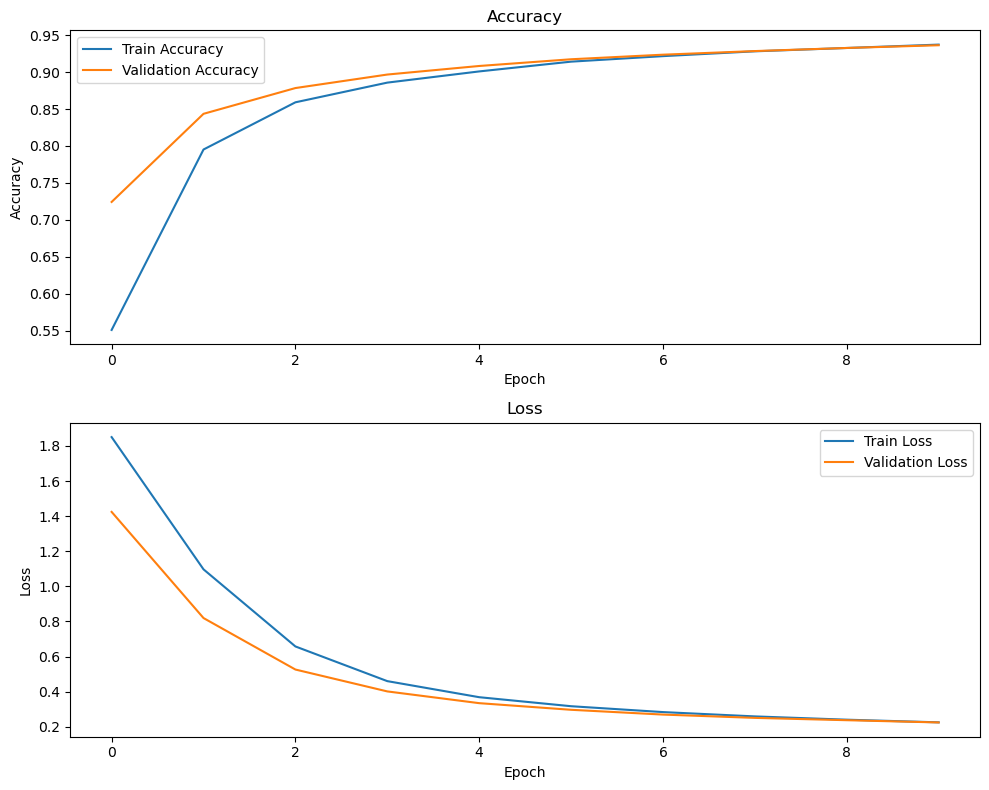

313/313 - 2s - loss: 0.2244 - accuracy: 0.9365 - 2s/epoch - 5ms/step
Test accuracy: 93.65%
1875/1875 - 9s - loss: 0.2146 - accuracy: 0.9401 - 9s/epoch - 5ms/step
Train accuracy: 94.01%


2024/04/13 21:23:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


<Figure size 640x480 with 0 Axes>

In [9]:
#Manual logging all the models
#Autologging all models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from tensorflow.keras.layers import Dropout


with mlflow.start_run(run_name="Main_Run_mauallog_3") as main_run:
    main_run_id = main_run.info.run_id
    
    # Start sub-experiment
    with mlflow.start_run(run_name="Sub_Run_1", nested=True) as sub_run:
        epoch=10
        config = {'hidden_layers': [20, 10]}
        # Log network configuration
        
        model1 = keras.Sequential()
        model1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model1.add(layers.Dense(20, activation='sigmoid'))
        model1.add(layers.Dense(10, activation='softmax'))
        model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history1 = model1.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history1)
        mlflow.log_figure(plt.gcf(), "training_history.png")

        test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model1.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model1"
        
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model1,artifact_path)
    
    with mlflow.start_run(run_name="Sub_Run_2", nested=True) as sub_run:
        epoch = 10
        config = {'hidden_layers': [256, 128]}
        model2 = keras.Sequential()
        model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model2.add(layers.Dense(128, activation='sigmoid'))
        model2.add(layers.Dense(10, activation='softmax'))
        model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history2 = model2.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history2)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model2.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model2"
        
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model2,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_3", nested=True) as sub_run:
  
        epoch= 10
        stepsperepoch = 4
        regularization = 0.001
        config = {'hidden_layers': [256, 128]}
        model3 = keras.Sequential()
        model3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(regularization)))
        model3.add(layers.Dense(10, activation='softmax'))
        model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history3 = model3.fit(x_train, y_train, epochs=epoch, steps_per_epoch=stepsperepoch, validation_data=(x_test, y_test))
        show_history(history3)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model3.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model3"
        
        mlflow.log_params({"steps_per_epoch":stepsperepoch}) 
        mlflow.log_params({"regularization":regularization}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model3,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_4", nested=True) as sub_run:
      
        epoch = 10
        dropout_1 = 0.3
        dropout_2 = 0.8
        config = {'hidden_layers': [256, 128]}
        model4 = keras.Sequential()
        model4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model4.add(Dropout(dropout_1))
        model4.add(layers.Dense(128, activation='sigmoid'))
        model4.add(Dropout(dropout_2))
        model4.add(layers.Dense(10, activation='softmax'))
        model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history4 = model4.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history4)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model4.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model4"
        
        mlflow.log_params({"dropout_1":dropout_1}) 
        mlflow.log_params({"dropout_2":dropout_2}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model4,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_5", nested=True) as sub_run:
        
        min_delta=0.01
        patience= 8
        epoch = 10
        config = {'hidden_layers': [256, 128]}
        model5 = keras.Sequential()
        model5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model5.add(layers.Dense(128, activation='sigmoid'))
        model5.add(layers.Dense(10, activation='softmax'))
        model5.summary()
        model5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
        es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=min_delta, patience=patience)
        history5=model5.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), callbacks=[es])
        show_history(history5)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model5.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model5.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model5"
        
        mlflow.log_params({"min_delta":min_delta})
        mlflow.log_params({"patience":patience})
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model5,artifact_path)
        
        
        
    with mlflow.start_run(run_name="Sub_Run_6", nested=True) as sub_run:
     
        epoch = 10
        learning = 2
        config = {'hidden_layers': [20,10]}
        model6 = keras.Sequential()
        model6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model6.add(layers.Dense(10, activation='sigmoid'))
        model6.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history6= model6.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
        show_history(history6)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model6.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model6.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model6"
        
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model6,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_7", nested=True) as sub_run:
    
        epoch = 10
        learning = 0.1
        config = {'hidden_layers': [20,10]}
        model7 = keras.Sequential()
        model7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model7.add(layers.Dense(10, activation='sigmoid'))
        model7.add(layers.Dense(10, activation='softmax'))
        model7.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history7= model7.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history7)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model7.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model7.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model7"
        
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model7,artifact_path)
     
    with mlflow.start_run(run_name="Sub_Run_8", nested=True) as sub_run:
 
        epoch = 10
        learning = 0.05
        config = {'hidden_layers': [20,10]}
        model8 = keras.Sequential()
        model8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model8.add(layers.Dense(10, activation='sigmoid'))
        model8.add(layers.Dense(10, activation='softmax'))
        model8.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning)
        model8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history8= model8.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history8)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model8.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model8.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model8"
        mlflow.log_params({"learning":learning}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model8,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_9", nested=True) as sub_run:
    
        epoch = 10
        learning = 0.65
        momentum=0.4
        config = {'hidden_layers': [20,10]}
        model9 = keras.Sequential()
        model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model9.add(layers.Dense(10, activation='sigmoid'))
        model9.add(layers.Dense(10, activation='softmax'))
        model9.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
        show_history(history9)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model9.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model9"
        
        mlflow.log_params({"learning":learning})
        mlflow.log_params({"momentum":momentum}) 
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model9,artifact_path)
        
    with mlflow.start_run(run_name="Sub_Run_10", nested=True) as sub_run:
        
        epoch = 10
        batch= 128
        learning = 0.01
        momentum= 1
        config = {'hidden_layers': [20,10]}
        model10 = keras.Sequential()
        model10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model10.add(layers.Dense(10, activation='sigmoid'))
        model10.add(layers.Dense(10, activation='softmax'))
        model10.summary()
        opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
        model10.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history10=model10.fit(x_train, y_train, batch_size=batch, epochs=epoch ,validation_data=(x_test, y_test))
        show_history(history10)
        mlflow.log_figure(plt.gcf(), "training_history.png")
        
        test_loss, test_acc = model10.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100*test_acc))
        train_loss, train_acc = model10.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100*train_acc))
        artifact_path = "model10"
        
        mlflow.log_params({"learning":learning})
        mlflow.log_params({"momentum":momentum})
        mlflow.log_params({"batch":batch})
        mlflow.log_params(config) 
        mlflow.log_param("epochs", epoch)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.keras.log_model(model10,artifact_path)



In [ ]:
'''Model1:
    epoch=5
    config = {'hidden_layers': [20, 10]}
    model1 = keras.Sequential()
    model1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model1.add(layers.Dense(20, activation='sigmoid'))
    model1.add(layers.Dense(10, activation='softmax'))
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history1 = model1.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

Model2:
    epoch = 5
    config = {'hidden_layers': [256, 128]}
    model2 = keras.Sequential()
    model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model2.add(layers.Dense(128, activation='sigmoid'))
    model2.add(layers.Dense(10, activation='softmax'))
    model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history2 = model2.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
    
Model3:
from tensorflow.keras import regularizers
    epoch= 5
    stepsperepoch = 5
    regularization = 0.01
    config = {'hidden_layers': [256, 128]}
    model3 = keras.Sequential()
    model3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(regularization)))
    model3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(regularization)))
    model3.add(layers.Dense(10, activation='softmax'))
    model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history3 = model3.fit(x_train, y_train, epochs=epoch, steps_per_epoch=stepsperepoch, validation_data=(x_test, y_test))

Model4

    epoch = 5
    dropout_1 = 0.7
    dropout_2 = 0.6
    config = {'hidden_layers': [256, 128]}
    model4 = keras.Sequential()
    model4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model4.add(Dropout(dropout_1))
    model4.add(layers.Dense(128, activation='sigmoid'))
    model4.add(Dropout(dropout_2))
    model4.add(layers.Dense(10, activation='softmax'))
    model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history4 = model4.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
    
Model5
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
    
    min_delta=0.01
    patience=2
    epoch = 5
    config = {'hidden_layers': [256, 128]}
    model5 = keras.Sequential()
    model5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model5.add(layers.Dense(128, activation='sigmoid'))
    model5.add(layers.Dense(10, activation='softmax'))
    model5.summary()
    model5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
    es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=min_delta, patience=patience)
    history5=model5.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), callbacks=[es])
    
Model6
    epoch = 5
    learning = 10
    config = {'hidden_layers': [20,10]}
    model6 = keras.Sequential()
    model6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model6.add(layers.Dense(10, activation='sigmoid'))
    model6.add(layers.Dense(10, activation='softmax'))
    opt_new = keras.optimizers.SGD(learning_rate=learning)
    model6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history6= model6.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))
    
Model7

    epoch = 5
    learning = 0.00001
    config = {'hidden_layers': [20,10]}
    model7 = keras.Sequential()
    model7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model7.add(layers.Dense(10, activation='sigmoid'))
    model7.add(layers.Dense(10, activation='softmax'))
    model7.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning)
    model7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history7= model7.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    
Model8

    epoch = 5
    learning = 0.01
    config = {'hidden_layers': [20,10]}
    model8 = keras.Sequential()
    model8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model8.add(layers.Dense(10, activation='sigmoid'))
    model8.add(layers.Dense(10, activation='softmax'))
    model8.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning)
    model8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history8= model8.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    
Model9

    epoch = 5
    learning = 0.01
    momentum=0.5
    config = {'hidden_layers': [20,10]}
    model9 = keras.Sequential()
    model9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model9.add(layers.Dense(10, activation='sigmoid'))
    model9.add(layers.Dense(10, activation='softmax'))
    model9.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
    model9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history9= model9.fit(x_train, y_train, epochs=epoch,validation_data=(x_test, y_test))
    
Model10

    epoch = 5
    batch=512
    learning = 0.01
    momentum=0.5
    config = {'hidden_layers': [20,10]}
    model10 = keras.Sequential()
    model10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model10.add(layers.Dense(10, activation='sigmoid'))
    model10.add(layers.Dense(10, activation='softmax'))
    model10.summary()
    opt_new = keras.optimizers.SGD(learning_rate=learning, momentum=momentum)
    model10.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history10=model10.fit(x_train, y_train, batch_size=batch, epochs=epoch ,validation_data=(x_test, y_test))



    
'''